**İçindekiler**
```
1. Giriş
  1.1. Doğal dil işleme nedir?
  1.2. Recurrent Neural Networks
  1.3. Yardımcı işlevler fonksiyonları
2. Veriler
  2.1. Doğal afet tweetleri - Veri kümesini indir
  2.2. Verileri inceleme
  2.3. Verileri eğitim, doğrulama ve test setlerine ayrıştırma
  2.4. Metni sayılara dönüştürme
  2.5. Metin vektörleştirme (Tokenizasyon)
  2.6. Gömme katmanı oluşturma
3. Modeller
  3.1. Model 0: Naif Bayes (temel model)
  3.2.Değerlendirme fonksiyonu
  3.3. Model 1: İleri besleme sinir ağı (yoğun model)
  3.4. Model performanslarını karşılaştırma fonksiyonu yazma
  3.5. Öğrenilmiş gömmeleri görselleştirme
  3.6. Model 2: LSTM modeli
  3.7. Model 3: GRU modeli
  3.8. Model 4: Çift yönlü-LSTM modeli
  3.9. Model 5: 1D Evrişimli Sinir Ağı
  3.10. Model 6: TensorFlow Hub Önceden Eğitilmiş Özellik Çıkarıcı
  3.11. Model 7: Model 6 ile eğitim verilerinin %10'u ile model denemesi
4. Tüm model performanslarının kıyaslanması
5. Modelleri birleştirmek
6. Eğitimli bir modeli kaydetme ve yükleme
7. En yanlış örnekleri bulmak
8. Test etmek
  8.1. Test veri kümelerinde tahminlerde bulunmak
  8.2. Yeni (dışarıdan) örnekler ile modeli test etmek
  8.3. Kişisel denemelerim
9. Hız - Puan kıyası
10. Kaynakça
```

# **1. Giriş**

### **1.1. Doğal dil işleme nedir?**

Doğal dil işlemenin (NLP) temel amacı, doğal dilden bilgi elde etmektir. https://becominghuman.ai/a-simple-introduction-to-natural-language-processing-ea66a1747b32

Doğal dil geniş bir terimdir, ancak aşağıdakilerden herhangi birini kapsadığını düşünebilirsiniz:

* Metin (bir e-postada, blog gönderisinde, kitapta, Tweet'te bulunan gibi)
* Konuşma (bir doktorla yaptığınız bir konuşma, akıllı bir hoparlöre verdiğiniz sesli komutlar)

Bir e-posta uygulaması oluşturuyorsanız, spam olup olmadıklarını görmek için gelen e-postaları taramak isteyebilirsiniz (sınıflandırma).

Müşteri geri bildirim şikayetlerini analiz etmeye çalışıyorsanız, işletmenizin hangi bölümü için olduklarını keşfetmek isteyebilirsiniz.

🔑 Not: Bu veri türlerinin her ikisi de genellikle dizi olarak adlandırılır (bir cümle bir kelime dizisidir). Bu nedenle, NLP problemlerinde karşılaşacağınız yaygın bir terim seq2seq olarak adlandırılır, başka bir deyişle, başka bir dizi üretmek için bir dizide bilgi bulmak (örneğin, bir konuşma komutunu bir dizi metin tabanlı adıma dönüştürmek).

Bazı uygulama alanları;
  * Wikipedia makalelerini sınıflandırma.
  * Şiir ya da blog köşe yazısı üretme.
  * Ses ayrıştırma.
  * Arama motoru, akıllı asistan, otomatik doğrulama.
  * Çeviri dil, sıralı ilerler (dil kuralı, sıralı problemler)
  * Text generation, voice ass. ses dalgalarını alıp onu metne dönüştürür. Sonra o metinden bilgi üretip one to many (bir resime bakıp örnek başlık bulma) veya many to one (bir youtube videosu yorumlarından duygu analizi).

*Metin -> sayılara dönüşmek -> bir model oluşturmak -> kalıpları bulmak için modeli eğitmek -> kalıpları kullanmak (tahminlerde bulunmak)*

Inputs olarak numerical encoding var. Metin sayılara dönüştürülür.

Inputs --> ML algorithm --> Outputs

Çıktıda da aynı şekilde matrislere sayılara dönüştürülür ve tahmin etiketleri vardır (örn %90 felaket %10 değil gibi).

Metin sınıflandırma için,
- Inputs [batch_size, embedding_size]
    * Örneğin [None, 512], [32, 512]
    * Outputs örnek [0.99, 0.01], shape[2]

* Parti boyutu olarak 32 meşhurdur.
* Embedding size üzerinde çalışılan problem tipine göre değişebilir.
* Yagın gömme boyutları 64, 128, 256, 512. Sekizin katları GPU hesaplamada temel kuraldır.
* Yerleştirme boyutu ne kadar yüksekse sayılar o kadar fazla.

Doğru veriyi hazırlamada,
* Tüm veri rakamlara dönüştürülmeli.
* Tüm tensörler doğru şekillerde olmalı.

**Tensorflow Modelleme Adımları:**
* Veriyi hazırla (tensörlere dönüştürme)
* Önceden eğitilmiş bir model inşa et (probleme uyabilecek)
* Modeli veriye uydur ve tahminleme yap
* Modeli değerlendir
* Deneyler geliştir
* Modelini kaydet ve yeniden yükle


### **1.2. Recurrent Neural Networks**

Tekrarlayan bir sinir ağı düğümler arası bağlantılardan oluşan yapay bir sinir ağıdır (zamansal dizi).

Hiperparametreler:

* **Input text(s):** Kalıpları keşfetmek istediğiniz metinleri / dizileri hedefler.
  * Metin veya dizi olan herhangi bir şey

* **Input layer:** Hedef dizileri alır.
  * input shape = [batch_size, embedding_size] ya da [batch_size, sequence_shape]

* **Text vectorization layer:**
Giriş dizilerini sayılarla eşler. Canlı kelimeli bir topluluk gibi dönüştürür. Örneğin bir tweet'teki her kelimeyi kelime kelime alır.
  * tf.keras.layers.experimental.preprocessing.Textvectorization

* **Embedding:** Metin vektörlerinin eşlemesini gömme matrisine dönüştürür (kelimelerin nasıl ilişkilendirildiğinin temsili). Kelimeleri sayı olarak temsil eder. Her kelime bir sayıdır. Ancak bu, vektör katmanını bir gömme matrisine dönüştürür. Bu, modelin farklı kelimelerle birbiriyle nasıl ilişkili olduğunu yakalamaya yarar. king - man + woman = queen
  * tf.keras.layers.Embedding

* **RNN cells:** Dizilerdeki kalıpları bulur.
  * SimpleRNN, LSTM, GRU

* **Hidden activation:** Öğrenilen özelliklere doğrusal olmama özelliği ekler (düz olmayan çizgiler)
  * tf.keras.activations.tanh (hyperbolic tangent)

* **Pooling layer:** Öğrenilen sıra özelliklerinin boyutluluğu azaltıldı (genellikle Conv1D modelleri)
  * Ortalama için tf.keras.layers.GlobalAveragePooling1D, max için tf.keras.layers.GlobalMaxPool1D

* **Fully connected layer:** Daha da fazla yinelenen katmanlardan öğrenilen özellikleri geliştirir
  * tf.keras.layers.Dense

* **Output layer:** Öğrenilen özellikleri alır ve bunları hedef etiketler şeklinde çıkarır
  * output shape = [number_of_classes]

* **Output activation:** Çıktı katmanına doğrusal olmayan özellikler ekler
  * tf.keras.activations.sigmoid (ikili sınıflandırma) ya da tf.keras.activations.softmax

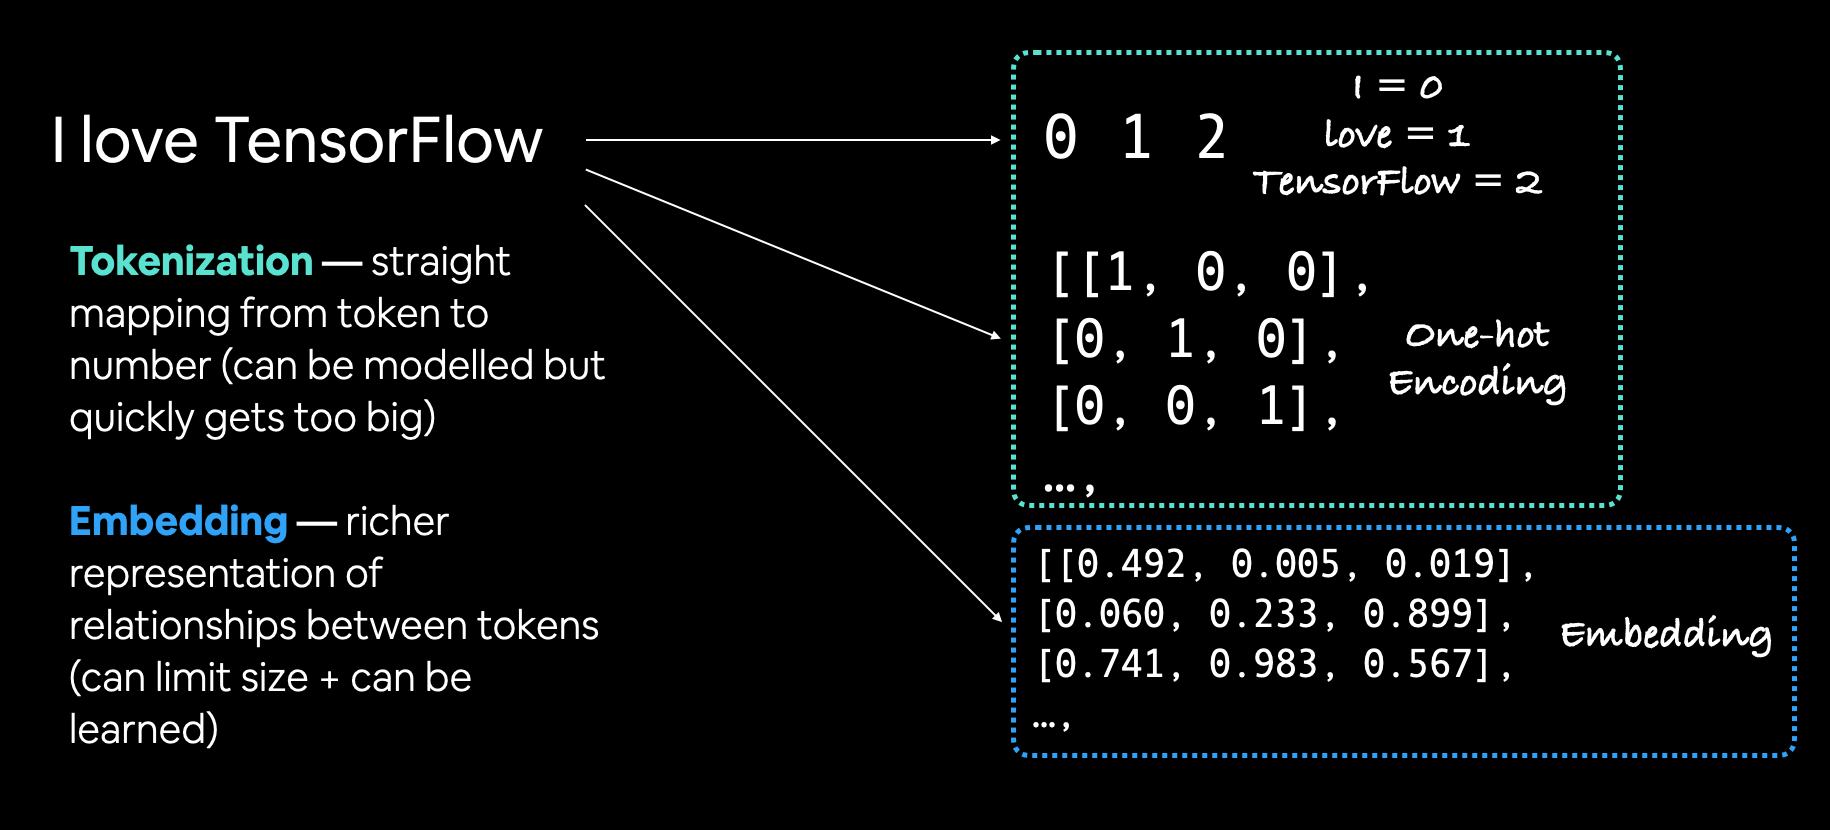

In [ ]:
from IPython.display import display, Image

# Resmin URL'si
image_url = "https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/08-tokenization-vs-embedding.png"

# Resmi göster
display(Image(image_url))

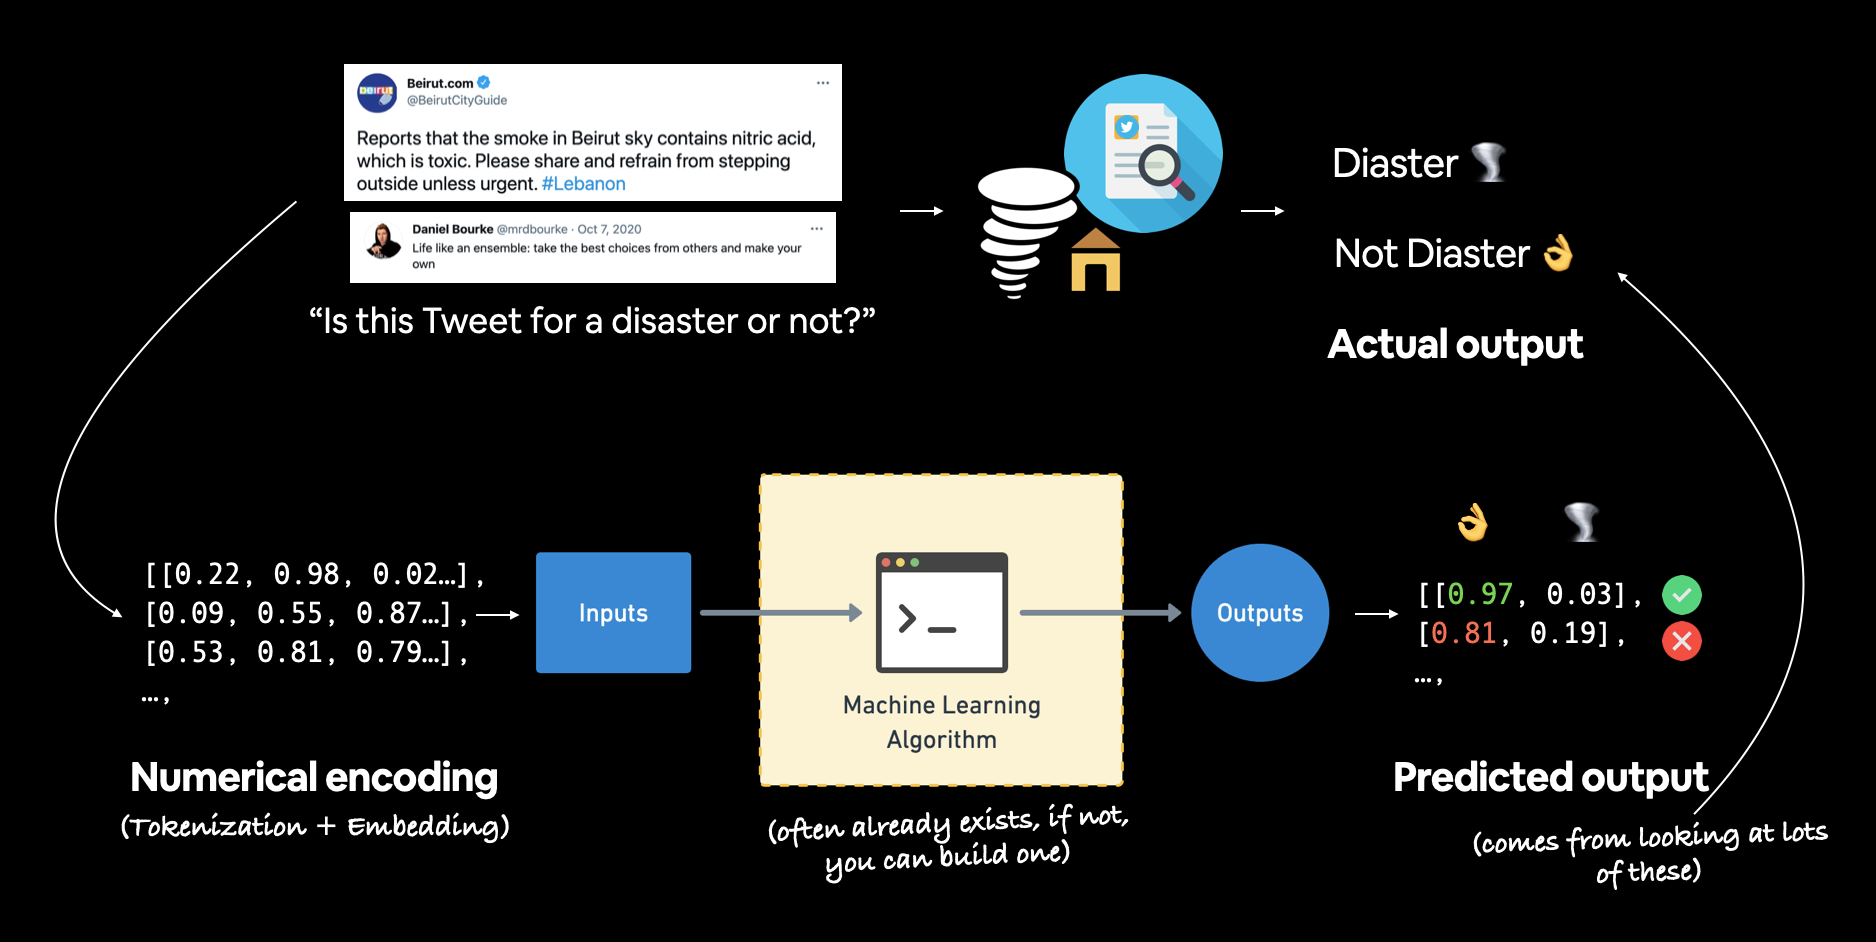

In [ ]:
from IPython.display import display, Image

# Resmin URL'si
image_url = "https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/08-text-classification-inputs-and-outputs.png"

# Resmi göster
display(Image(image_url))

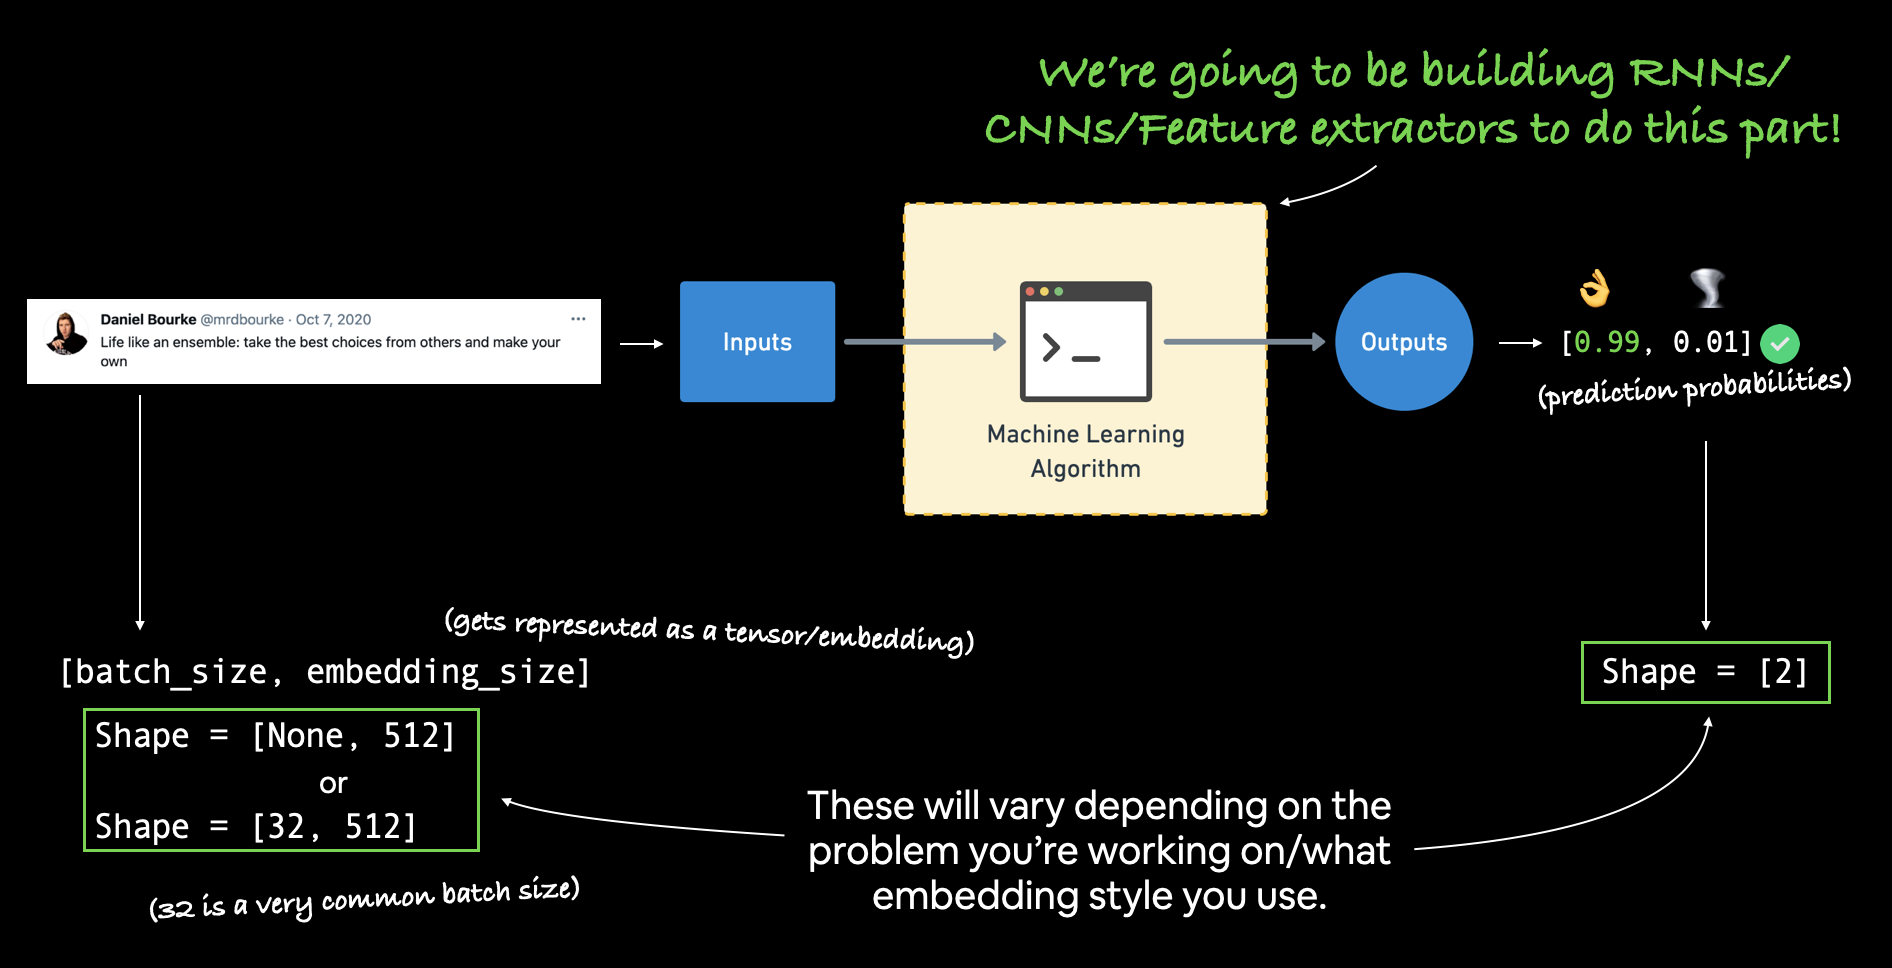

In [ ]:
from IPython.display import display, Image

# Resmin URL'si
image_url = "https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/08-inputs-and-outputs-with-shapes-and-models-were-going-to-build.png"

# Resmi göster
display(Image(image_url))

Bir RNN'nin öncülü basittir: gelecek konusunda size yardımcı olmak için geçmişten gelen bilgileri kullanın (tekrarlayan terimin geldiği yer burasıdır). Başka bir deyişle, bir giriş (X) alın ve önceki tüm girdilere dayalı olarak bir çıktı (y) hesaplayın.

Bu kavram, özellikle doğal dil metninin pasajları (Tweetlerimiz gibi) gibi dizilerle uğraşırken yararlıdır.

Örneğin, bu cümleyi okuduğunuzda, mevcut kelime köpeğinin anlamını deşifre ederken önceki kelimeleri bağlama sokarsınız.

Geçerli bir kelime olan "köpek" kelimesini sonuna koydum ama cümlenin geri kalanı bağlamında bir anlam ifade etmiyor.

Bir RNN bir metin dizisine (zaten sayısal biçimde) baktığında, öğrendiği kalıplar dizinin sırasına göre sürekli olarak güncellenir.

Basit bir örnek için iki cümle alın:

1. Geçen hafta büyük deprem, değil mi?

2. Geçen hafta büyük bir deprem olmadı.

Her ikisi de tam olarak aynı kelimeleri içerir ancak farklı anlamlara sahiptir. Kelimelerin sırası anlamı belirler (noktalama işaretlerinin de anlamı belirlediği tartışılabilir, ancak basitlik uğruna, kelimelere odaklanalım).

Tekrarlayan sinir ağları bir dizi dizi tabanlı problem için kullanılabilir:

* Bire bir: bir giriş, bir çıkış, örneğin görüntü sınıflandırması.

* Bire çok: bir giriş, görüntü başlığı gibi birçok çıktı (görüntü girişi, altyazı çıkışı olarak bir metin dizisi).

* Bire çok: birçok girdi, metin sınıflandırması gibi bir çıktı (bir Tweet'i gerçek diaster olarak sınıflandırmak veya gerçek diaster olarak sınıflandırmamak).

* Çoktan çoka: birçok girdi, makine çevirisi (İngilizce'den İspanyolca'ya çeviri) veya konuşmadan metne (giriş olarak ses dalgası, çıktı olarak metin) gibi birçok çıktı.

Vahşi doğada RNN'lerle karşılaştığınızda, büyük olasılıkla aşağıdakilerin varyantlarıyla karşılaşacaksınız:

1. Uzun kısa süreli hafıza hücreleri (LSTM'ler).

2. Kapılı tekrarlayan birimler (GRU'lar).

3. Çift yönlü RNN'ler (soldan sağa ve sağdan sola bir dizi boyunca ileri ve geri geçer).

Yazmak üzere olduğumuz kodun perde arkasında neler olup bittiğini daha iyi anlamak için aşağıdaki kaynakları tavsiye ederim:

* MIT Tekrarlayan Sinir Ağları Üzerine Derin Öğrenme Konferansı - tekrarlayan sinir ağlarının arka planını açıklar ve LSTM'leri tanıtır. https://www.youtube.com/watch?v=SEnXr6v2ifU&feature=youtu.be

* Andrej Karpathy'nin Tekrarlayan Sinir Ağlarının Mantıksız Etkinliği - çeşitli diziler üreten örneklerle RNN'lerin gücünü göstermektedir. http://karpathy.github.io/2015/05/21/rnn-effectiveness/

* Chris Olah'ın LSTM'lerini anlamak - muhtemelen en popüler RNN yapı taşı olan LSTM hücresinin mekaniğine derinlemesine (ve teknik) bir bakış. https://colah.github.io/posts/2015-08-Understanding-LSTMs/

### **1.3. Yardımcı işlevler fonksiyonları**

In [ ]:
# Yardımcı fonksiyonların içeri aktarılması
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-12-22 18:47:51--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-12-22 18:47:51 (119 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
### Yardımcı Fonksiyonların İçeriği

import tensorflow as tf

# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).

  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.image.decode_jpeg(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

# Make a function to predict on images and plot them (works with multi-class)
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instand to store log files.

  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"

  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

# Plot the validation and training data separately
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two TensorFlow model History objects.

    Args:
      original_history: History object from original model (before new_history)
      new_history: History object from continued model training (after original_history)
      initial_epochs: Number of epochs in original_history (new_history plot starts from here)
    """

    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

# Create function to unzip a zipfile into current working directory
# (since we're going to be downloading and unzipping a few files)
import zipfile

def unzip_data(filename):
  """
  Unzips filename into the current working directory.

  Args:
    filename (str): a filepath to a target zip folder to be unzipped.
  """
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()

# Walk through an image classification directory and find out how many files (images)
# are in each subdirectory.
import os

def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.

  Args:
    dir_path (str): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
      y_true: true labels in the form of a 1D array
      y_pred: predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [ ]:
import datetime
print(f"Bu çalışma kitabının son çalışma tarihi: {datetime.datetime.now()}")

Bu çalışma kitabının son çalışma tarihi: 2024-12-22 18:48:03.609061


In [ ]:
# GPU kontrolü
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-2e61e3af-f230-b5a6-1439-95e1724f16ab)


---

### 1. `load_and_prep_image(filename, img_shape=224, scale=True)`

```python
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).
  """
```
- **Açıklama**: Fonksiyon tanımlanıyor. Parametreler: `filename` (görüntü dosya adı), `img_shape` (görüntü boyutu, varsayılan 224), ve `scale` (görüntü piksel değerlerinin ölçeklenip ölçeklenmeyeceği, varsayılan True).

```python
  # Read in the image
  img = tf.io.read_file(filename)
```
- **Açıklama**: `tf.io.read_file()` fonksiyonu, belirtilen dosyadaki resmi okur ve byte formatında bir veri döndürür.

```python
  # Decode it into a tensor
  img = tf.image.decode_jpeg(img)
```
- **Açıklama**: `tf.image.decode_jpeg()` fonksiyonu, byte formatındaki resmi bir tensor'a dönüştürür. JPEG formatındaki bir görüntüyü okur ve işlemesi için bir tensöre çevirir.

```python
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
```
- **Açıklama**: `tf.image.resize()` fonksiyonu, resmi belirtilen boyuta (default: 224x224) yeniden boyutlandırır.

```python
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img
```
- **Açıklama**: Eğer `scale` parametresi `True` ise, görüntüdeki piksel değerleri 0-255 aralığından 0-1 aralığına ölçeklenir. Bu genellikle derin öğrenme modellerinde daha iyi sonuç almak için kullanılır. Eğer `scale` False ise, orijinal değerler olduğu gibi döndürülür.

---

### 2. `make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False)`

```python
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels."""
```
- **Açıklama**: Fonksiyon tanımlanıyor. `y_true` (gerçek etiketler), `y_pred` (modelin tahmin ettiği etiketler), `classes` (sınıf isimleri, opsiyonel), `figsize` (grafik boyutu), `text_size` (grafikteki metin boyutu), `norm` (normalizasyon), `savefig` (grafiği kaydetme) parametrelerini alır.

```python
  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
```
- **Açıklama**: `confusion_matrix()` fonksiyonu ile gerçek ve tahmin edilen etiketlere dayalı bir karışıklık matrisi oluşturulur.

```python
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
```
- **Açıklama**: Karışıklık matrisi normalleştirilir. Her satır, toplamına bölünerek, her sınıfın oranı hesaplanır.

```python
  n_classes = cm.shape[0] # find the number of classes we're dealing with
```
- **Açıklama**: Karışıklık matrisindeki sınıf sayısını bulur (matrisin satır sayısı).

```python
  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)
```
- **Açıklama**: `matplotlib` kullanılarak karışıklık matrisi görselleştirilir. `cmap=plt.cm.Blues` ile renkler mavi tonlarında olur ve doğru sınıfların daha koyu renklerde görünmesini sağlar.

```python
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
```
- **Açıklama**: Eğer `classes` verilmişse, sınıf etiketlerini kullanır. Aksi takdirde, sınıf sayısı kadar tam sayılar (0, 1, 2, ...) etiket olarak kullanılır.

```python
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=labels,
         yticklabels=labels)
```
- **Açıklama**: X ve Y eksenlerinin etiketleri belirlenir. Gerçek etiketler (Y ekseni) ve tahmin edilen etiketler (X ekseni) grafikte etiketlenir.

```python
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()
```
- **Açıklama**: X ekseninin etiketinin grafikte alt kısımda olmasını sağlar.

```python
  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.
```
- **Açıklama**: Karışıklık matrisindeki hücrelerin metin rengini belirlemek için bir eşik değeri hesaplanır. Eğer hücredeki değer eşikten büyükse, metin rengi beyaz, küçükse siyah olur.

```python
  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
```
- **Açıklama**: Karışıklık matrisinin her hücresine, ilgili değeri ve yüzdesini (normalizasyon varsa) yazdırır.

```python
  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")
```
- **Açıklama**: Eğer `savefig=True` ise, oluşturulan grafik kaydedilir.

---

### 3. `pred_and_plot(model, filename, class_names)`

```python
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
```
- **Açıklama**: Fonksiyon tanımlanıyor. Parametreler: `model` (eğitilmiş model), `filename` (görüntü dosyasının yolu), ve `class_names` (sınıf isimleri).

```python
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)
```
- **Açıklama**: `load_and_prep_image` fonksiyonu çağrılarak resim yüklenir ve modelin kabul edeceği formata dönüştürülür.

```python
  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
```
- **Açıklama**: Resmin üzerinde tahmin yapılır. `tf.expand_dims` ile görüntü tensörü, modele uygun hale getirilir (batched formatta).

```python
  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round
```
- **Açıklama**: Eğer çoklu sınıf varsa, en yüksek olasılığa sahip sınıf alınır. Tek sınıf problemi ise yuvarlanarak tahmin edilen sınıf belirlenir.

```python
  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);
```
- **Açıklama**: Görüntü görselleştirilir ve baş

lık olarak tahmin edilen sınıf ismi yazılır.

---

Tabii! Kalan fonksiyonları açıklayalım:

---

### 4. `create_tensorboard_callback(dir_name, experiment_name)`

```python
def create_tensorboard_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instance to store log files.

  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"
  """
```
- **Açıklama**: Bu fonksiyon, TensorBoard için bir geri çağırma (callback) oluşturur ve log dosyalarını belirtilen bir dizine kaydeder. Bu, modelin eğitim sürecini görselleştirmek için kullanılabilir.

```python
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
```
- **Açıklama**: Log dosyalarının kaydedileceği dizin oluşturulur. Bu dizin, `dir_name` (dizin adı), `experiment_name` (deney adı) ve geçerli tarih/saat bilgisini içerir. Bu sayede her eğitim sürecine özgü bir dizin oluşturulmuş olur.

```python
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
```
- **Açıklama**: TensorFlow'un `TensorBoard` callback fonksiyonu, eğitim sırasında log dosyalarını belirtilen `log_dir` dizinine kaydetmek için oluşturulur.

```python
  print(f"Saving TensorBoard log files to: {log_dir}")
```
- **Açıklama**: TensorBoard log dosyalarının nereye kaydedileceğini terminale yazdırır.

```python
  return tensorboard_callback
```
- **Açıklama**: Oluşturulan `tensorboard_callback` nesnesini geri döndürür, böylece eğitim sırasında bu callback kullanılabilir.

---

### 5. `plot_loss_curves(history)`

```python
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """
```
- **Açıklama**: Bu fonksiyon, eğitim sürecinin kayıp (loss) ve doğruluk (accuracy) grafiklerini çizer. `history` parametresi, modelin eğitim sürecinde kaydedilen metrikleri içerir.

```python
  loss = history.history['loss']
  val_loss = history.history['val_loss']
```
- **Açıklama**: `history` nesnesinden eğitim ve doğrulama kayıpları (loss) alınır.

```python
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
```
- **Açıklama**: `history` nesnesinden eğitim ve doğrulama doğruluğu (accuracy) alınır.

```python
  epochs = range(len(history.history['loss']))
```
- **Açıklama**: Eğitim sürecindeki her bir epoch (dönem) için x ekseni verisini oluşturur.

```python
  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()
```
- **Açıklama**: Eğitim ve doğrulama kayıplarını (loss) çizerek kayıp eğrisini görselleştirir.

```python
  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();
```
- **Açıklama**: Eğitim ve doğrulama doğruluğu (accuracy) grafiklerini çizer.

---

### 6. `compare_historys(original_history, new_history, initial_epochs=5)`

```python
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two TensorFlow model History objects.

    Args:
      original_history: History object from original model (before new_history)
      new_history: History object from continued model training (after original_history)
      initial_epochs: Number of epochs in original_history (new_history plot starts from here)
    """
```
- **Açıklama**: Bu fonksiyon, iki farklı `History` nesnesini karşılaştırır (örneğin, orijinal eğitim ile yeniden eğitim). `original_history` (ilk eğitim) ve `new_history` (yeniden eğitim) arasındaki farklar görsel olarak gösterilir.

```python
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]
```
- **Açıklama**: Orijinal eğitimin doğruluk ve kayıp metrikleri alınır.

```python
    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]
```
- **Açıklama**: Orijinal ve yeni eğitim süreçlerinden gelen doğruluk ve kayıp değerleri birleştirilir.

```python
    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
```
- **Açıklama**: Eğitim ve doğrulama doğruluğu grafiklerini çizerek orijinal ve yeni eğitimin nasıl ilerlediğini gösterir.

```python
    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()
```
- **Açıklama**: Eğitim ve doğrulama kayıplarının grafiklerini çizerek karşılaştırma yapar. Ayrıca, ince ayar (fine-tuning) başlamadan önceki ve sonraki kayıpları da gösterir.

---

### 7. `unzip_data(filename)`

```python
def unzip_data(filename):
  """
  Unzips filename into the current working directory.

  Args:
    filename (str): a filepath to a target zip folder to be unzipped.
  """
```
- **Açıklama**: Bu fonksiyon, verilen bir zip dosyasını geçerli çalışma dizinine çıkarır.

```python
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()
```
- **Açıklama**: `zipfile.ZipFile` ile belirtilen zip dosyası açılır, ardından `extractall()` ile tüm içerik geçerli dizine çıkarılır. Son olarak, `close()` ile dosya kapatılır.

---

### 8. `walk_through_dir(dir_path)`

```python
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.

  Args:
    dir_path (str): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
```
- **Açıklama**: Bu fonksiyon, belirtilen dizindeki tüm alt dizinleri ve dosyaları listeleyerek her bir alt dizindeki dosya sayısını yazdırır.

```python
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
```
- **Açıklama**: `os.walk()` ile belirtilen dizin altındaki tüm dizinler ve dosyalar taranır. Her alt dizin için, içinde bulunan dosya sayısı yazdırılır.

---

### 9. `calculate_results(y_true, y_pred)`

```python
def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
      y_true: true labels in the form of a 1D array
      y_pred: predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
```
- **Açıklama**: Bu fonksiyon, ikili sınıflandırma için modelin doğruluğunu (accuracy), kesinliğini (precision), duyarlılığını (recall) ve F1 skorunu hesaplar.

```python
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100


```
- **Açıklama**: Gerçek ve tahmin edilen etiketler arasındaki doğruluk hesaplanır.

```python
  # Calculate model precision, recall and f1 score using "weighted average"
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
```
- **Açıklama**: Kesinlik (precision), duyarlılık (recall) ve F1 skoru, `precision_recall_fscore_support` fonksiyonu ile hesaplanır ve ağırlıklı ortalamalar alınır.

```python
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
```
- **Açıklama**: Hesaplanan sonuçlar bir sözlükte toplanır.

```python
  return model_results
```
- **Açıklama**: Sonuçları içeren sözlük geri döndürülür.

---

# **2. Veriler**

Doğal afetler hakkında metin tabanlı Tweetler içeren Kaggle'dan veri kümesi indirelim. Bu bir felaket veya değil.

Gerçek Tweetler aslında felaketlerle ilgilidir, örneğin:

Jetstar ve Virgin, Raung Dağı yanardağından gelen kül nedeniyle Bali uçuşlarını tekrar iptal etmek zorunda kaldı

Gerçek Olmayan Tweetler, felaketlerle ilgili olmayan Tweetlerdir (herhangi bir şeyde olabilirler), örneğin:

“Eğitim, dünyayı değiştirmek için kullanabileceğiniz en güçlü silahtır.” Nelson #Mandela #alıntı

Kolaylık sağlamak için, veri kümesi Kaggle'dan indirildi (bunu yapmak bir Kaggle hesabı gerektirir) ve indirilebilir bir zip dosyası olarak yüklendi.

🔑 Not: İndirilen orijinal veriler, Kaggle'dan nasıl indireceğinizle değiştirilmemiştir.

https://www.kaggle.com/c/nlp-getting-started/data

### **2.1. Doğal afet tweetleri - Veri kümesini indir**

In [ ]:
# Verileri indirin (Kaggle'dakiyle aynı)
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

# Verileri açın
unzip_data("nlp_getting_started.zip")

--2024-12-22 18:48:25--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.207, 172.217.203.207, 142.250.98.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip.1’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.005s  

2024-12-22 18:48:25 (114 MB/s) - ‘nlp_getting_started.zip.1’ saved [607343/607343]



İçeride üç dosya vardır;
* Sample_submission.csv - modelinizin tahminlerinin Kaggle yarışmasına göndereceğiniz dosyanın bir örneği.
* Train.csv - gerçek ve gerçek olmayan diaster Tweetlerinin eğitim örnekleri.
* Test.csv - gerçek ve gerçek olmayan diaster Tweetlerinin test örnekleri.

### **2.2. Verileri inceleme**

**Metin veri kümesini görselleştirme**

Metin veri örneklerimiz .csv dosyaları şeklindedir. Onları görsel hale getirmenin kolay bir yolu için, onları pandas DataFrame'e dönüştürelim.

📖 Okuma: Birçok farklı formatta metin veri kümelerine rastlayabilirsiniz. CSV dosyalarının (birlikte çalıştığımız) yanı sıra, muhtemelen .txt dosyaları ve .json dosyalarıyla da karşılaşacaksınız. Bu tür dosyalarla çalışmak için RealPython'un aşağıdaki iki makalesini okumanızı tavsiye ederim:

https://realpython.com/read-write-files-python/

https://realpython.com/python-json/

In [ ]:
# .csv dosyalarını pandaların DataFrame'lerine dönüştürün
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
# Eğitim veri çerçevesini karıştır
train_df_shuffled = train_df.sample(frac=1, random_state=42) # Tekrarlanabilirlik için random_state=42 ile karıştırın
train_df_shuffled.head()

# frac ile verilerin yüzde kaçının alınacağı belirlenir, 0.1 %10 demek
# inen veriler muhtemelen karışmıştır ama emin olmak için yine karıştırdık

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
train_df_shuffled["text"][13]

'#Flood in Bago Myanmar #We arrived Bago'

In [ ]:
# Kaggle verileri eğitim ve test olarak ikiye böldü
# Test verilerinin bir hedefi yok (tahmin etmeye çalıştığımız şey bu)
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
# Her sınıfta kaç değer var?
train_df.target.value_counts()

# İki değer var, sınıflandırma sorunu. 1 --> Felaket, 2 --> Felaket değil
# Ortalama %60 negatif sınıf (hedef = 0) ve %40 pozitif sınıf (hedef = 1) var

,count
target,
0,4342
1,3271


In [ ]:
# Örnek analizi
print(f"Toplam eğitim örnekleri: {len(train_df)}")
print(f"Toplam test örnekleri: {len(test_df)}")
print(f"Toplam örnekler: {len(train_df) + len(test_df)}")

Toplam eğitim örnekleri: 7613
Toplam test örnekleri: 3263
Toplam örnekler: 10876


In [ ]:
# Bazı rastgele eğitim örneklerini görselleştirelim
# Sırasıyla yapma, önyargılı olabilirsin, belirli bir alt kümeye bakıp karar verirsin, rastgele analiz çok önemli

import random
random_index = random.randint(0, len(train_df)-5) # toplam örnek sayısından daha yüksek olmayan rastgele indeksler oluşturun
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Hedef: {target}", "(Gerçek bir felaket)" if target > 0 else "(gerçek bir felaket değil)")
  print(f"Cümle:\n{text}\n")
  print("---\n")

Hedef: 0 (gerçek bir felaket değil)
Cümle:
go easy on her paul the poor woman has been traumatised by a cake #GBBO

---

Hedef: 1 (Gerçek bir felaket)
Cümle:
Salem 2 nuclear reactor shut down over electrical circuit failure on pump: The Salem 2 nuclear reactor had bee... http://t.co/5hkGXzJLmX

---

Hedef: 1 (Gerçek bir felaket)
Cümle:
it scares me that there's new versions of nuclear attack warnings like just knowing that governments still prepare for them

---

Hedef: 0 (gerçek bir felaket değil)
Cümle:
I'm glad when I call someone it's not an emergency since they never answer their phones or call back??

---

Hedef: 0 (gerçek bir felaket değil)
Cümle:
@davidolszak or the rioting in happy valley after penn state loses?

---



**Rastgele İndeks Seçimi**
   ```python
   random_index = random.randint(0, len(train_df)-5)
   ```
   - Burada `random.randint(0, len(train_df)-5)` ifadesi, `train_df` veri kümesindeki satır sayısına göre 0 ile `len(train_df)-5` arasında rastgele bir indeks seçiyor. Bu, veri kümesinde 5 örneği bir arada görmek için gereklidir, çünkü kod 5 örneği sırayla gösterecek.
   - `len(train_df)` eğitim kümesinin toplam satır sayısını ifade eder. `-5` ise, kodun sırasıyla 5 örneği alabilmesi için son 5 satıra ulaşmamak adına yapılmış bir sınırlamadır.

**Veri Kümesinden 5 Örnek Seçme**
   ```python
   for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
   ```
   - Burada `train_df_shuffled[["text", "target"]]` ifadesi, eğitim veri kümesinden sadece "text" ve "target" sütunlarını seçiyor. Bu sütunlar metin (text) ve hedef etiket (target) bilgilerinden oluşuyor.
   - `random_index:random_index+5` ifadesi, önceki rastgele belirlenen indeksten başlayıp 5 ardışık satırdan alınmasını sağlıyor.
   - `.itertuples()` fonksiyonu, DataFrame içindeki her satırı bir tuple (demet) olarak iterasyona sokar. Böylece her bir satırda (örnek) veriye erişim sağlanır.

**Veri Örneği Üzerinde İşlem**
   ```python
   _, text, target = row
   ```
   - `itertuples()` fonksiyonu her satırı bir tuple olarak döndürdüğü için burada ilk öğe olan `_` ile satırın ilk öğesi (satır index'i) atlanır, `text` ve `target` ise sırasıyla metin ve etiket bilgileriyle eşleşir.

**Hedefin Anlamlı Gösterimi**
   ```python
   print(f"Hedef: {target}", "(Gerçek bir felaket)" if target > 0 else "(gerçek bir felaket değil)")
   ```
   - Bu satır, hedef etiketin değerine göre bir yazı yazdırır. Eğer `target > 0` ise bu örneğin gerçek bir felaketi temsil ettiği anlamına gelir (örneğin, pozitif sınıf felakettir). Aksi takdirde, gerçek bir felaket değilse "(gerçek bir felaket değil)" yazdırılır.

   ---

### **2.3. Verileri eğitim, doğrulama ve test setlerine ayrıştırma**

Test setinde etiket olmadığı ve eğitilmiş modellerimizi değerlendirmenin bir yoluna ihtiyacımız olduğundan, bazı eğitim verilerini böleceğiz ve bir doğrulama seti oluşturacağız.

Modelimiz eğitildiğinde (Tweet örneklerinde kalıpları denediğinde), yalnızca eğitim setinden gelen verileri görecek ve doğrulama setini kullanarak görünmeyen veriler üzerinde nasıl performans gösterdiğini görebiliriz.

Daha sonra kullanım kolaylığı için bölmelerimizi panda Serisi veri türlerinden dize listelerine (metin için) ve int listelerine (etiketler için) dönüştüreceğiz.

Eğitim veri kümemizi bölmek ve bir doğrulama veri kümesi oluşturmak için Scikit-Learn'in train_test_split() yöntemini kullanacağız ve eğitim örneklerinin %10'unu doğrulama setine ayıracağız.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
from sklearn.model_selection import train_test_split

# Eğitim verilerini eğitim ve doğrulama kümelerine bölmek için train_test_split kullanın
train_sentences, val_sentences, train_labels, val_labels = train_test_split(
    train_df_shuffled["text"].to_numpy(),
    train_df_shuffled["target"].to_numpy(),
    test_size = 0.1, # örneklerin %10'unu doğrulama setine ayırın
    random_state = 42 # tekrarlanabilirlik için rastgele durumu ayarla
)

In [ ]:
# Kaç adet örnek var?
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [ ]:
# İlk on eğitim cümlesini etiketleri ile birlikte görüntüleme
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

### **2.4. Metni sayılara dönüştürme**

Etiketlerimiz sayısal biçimdedir (0 ve 1) ancak Tweetlerimiz dize biçimindedir.

Bir makine öğrenimi algoritması, girdilerinin sayısal biçimde olmasını gerektirir.

NLP'de metni sayılara dönüştürmek için iki ana kavram vardır:

* **Tokenizasyon** Kelimeden, karakterden veya alt kelimeden sayısal bir değere doğrudan eşleme. Üç ana tokenizasyon seviyesi vardır:

  1. "I love TensorFlow" cümlesiyle kelime düzeyinde tokenizasyon kullanılması "I"nin 0, "love"un 1 ve "TensorFlow"un 2 olmasıyla sonuçlanabilir. Bu durumda dizideki her kelime tek bir token olarak kabul edilir.
  2. A-Z harflerini 1-26 değerlerine dönüştürmek gibi karakter düzeyinde tokenizasyon. Bu durumda dizideki her karakter tek bir simge olarak kabul edilir.
  3. Alt kelime tokenizasyonu, kelime düzeyinde ve karakter düzeyinde tokenizasyon arasındadır. Tek tek kelimeleri daha küçük parçalara ayırmayı ve daha sonra bu küçük parçaları sayılara dönüştürmeyi içerir. Örneğin, "en sevdiğim yemek ananaslı pizzadır", "benim, favorim, avour, rite, fo, oo, od, is, pin, ine, app, le, piz, za" olabilir. Bunu yaptıktan sonra bu alt kelimeler sayısal bir değerle eşleştirilecektir. Bu durumda her kelime birden fazla belirteç olarak düşünülebilir.

* **Gömmeler** - Gömme, öğrenilebilen doğal dilin bir temsilidir. Temsil bir özellik vektörü biçiminde gelir. Örneğin, "dance" kelimesi 5 boyutlu vektör [-0,8547, 0,4559, -0,3332, 0,9877, 0,1112] ile temsil edilebilir. Burada özellik vektörünün boyutunun ayarlanabileceğini belirtmek önemlidir. Gömmeleri kullanmanın iki yolu vardır:

  1. Kendi gömme işleminizi oluşturun - Metniniz sayılara dönüştürüldükten sonra (gömme için gereklidir), bunları bir gömme katmanına (tf.keras.layers.Embeddding gibi) yerleştirebilirsiniz ve bir gömme temsili, model eğitimi sırasında öğrenilecektir. https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding
  2. Önceden öğrenilmiş bir yerleştirmeyi yeniden kullanın - Önceden eğitilmiş birçok yerleştirme çevrimiçi olarak mevcuttur. Bu önceden eğitilmiş yerleştirmeler genellikle büyük metin yığınları (örneğin, Wikipedia'nın tamamı) üzerinde öğrenilmiştir ve bu nedenle doğal dilin iyi bir temel temsiline sahiptir. Modelinizi başlatmak ve kendi özel görevinize göre ince ayar yapmak için önceden eğitilmiş bir yerleştirme kullanabilirsiniz.

  Belirteçleştirme örneği (kelimeden sayıya düz eşleme) ve gömme (belirteçler arasındaki ilişkilerin daha zengin temsili).

🤔 ***Soru: Hangi düzeyde tokenzation kullanmalıyım? Hangi gömmeyi seçmeliyim?***

Sorununuza bağlı. Karakter düzeyinde belirteçleştirmeyi/gömmeleri ve kelime düzeyinde belirteçleştirmeyi/gömmeyi deneyebilir ve hangisinin en iyi performansı gösterdiğini görebilirsiniz. Hatta onları istiflemeyi denemek isteyebilirsiniz (örneğin, tf.keras.layers.concatenate kullanarak gömme katmanlarınızın çıktılarını birleştirmek). https://www.tensorflow.org/api_docs/python/tf/keras/layers/concatenate

Önceden eğitilmiş kelime gömmeleri, Word2vec gömmeleri, GloVe gömmeleri ve TensorFlow Hub'da bulunan seçeneklerin çoğu, başlamak için harika yerlerdir.

🔑 Not: Önceden eğitilmiş bir bilgisayar görme modeli aramak gibi, sorununuz için kullanmak üzere önceden eğitilmiş kelime gömmelerini de arayabilirsiniz. "TensorFlow'da önceden eğitilmiş kelime gömmelerini kullan" gibi bir şey aramayı deneyin.

* http://jalammar.github.io/illustrated-word2vec/
* https://nlp.stanford.edu/projects/glove/
* https://www.kaggle.com/models?query=text-embedding&tfhub-redirect=true

Embeddings --> Her bir token için özellik vektör matrisidir. Ağırlık matrisidir böylece sinir ağında bir katman haline gelir ve öğrenebilir.

Tokenization --> Bir metin küçük parçalara bölünür ve buna token denir. Bir kelime veya harf olabilir.

### **2.5. Metin vektörleştirme (Tokenizasyon)**

Belirteç alıştırması yapacağız (kelimelerimizi sayılarla eşleme).

Kelimelerimizi belirtmek için yararlı ön işleme katmanı ***tf.keras.layers.experimental.preprocessing.TextVectorization***'ı kullanacağız.

TextVectorization katmanı aşağıdaki parametreleri alır:

* **Max_tokens** - Kelime dağarcığınızdaki maksimum kelime sayısı (örneğin 20000 veya metninizdeki benzersiz kelime sayısı), OOV (kelime dağarcığı dışında) belirteçleri için bir değer içerir.

* **Standardize** - Metni standartlaştırma yöntemi. Varsayılan, metni düşüren ve tüm noktalama işaretlerini kaldıran "lower_and_strip_punctuation" dır.

* **Bölme** - Metin nasıl bölünür, varsayılan boşluklarda bölünen "beyaz boşluk" dır.

* **Ngrams** - Belirteç bölmesi başına kaç kelime içereceği, örneğin, ngrams=2 belirteçleri 2'nin sürekli dizilerine böler.

* **Output_mode** - Belirteçler nasıl çıkarılır, "int" (tamsayı eşleme), "ikili" (bir-sıcak kodlama), "count" veya "tf-idf" olabilir. Daha fazla bilgi için belgelere bakın.

* **Output_sequence_length** - Çıktıya belirtilmiş dizinin uzunluğu. Örneğin, output_sequence_length=150 ise, tüm belirteçli diziler 150 belirteç uzunluğunda olacaktır.

* **Pad_to_max_tokens** - Varsayılan olarak False, True ise, kelime dağarcığındaki benzersiz belirteçlerin sayısı max_tokens'ten az olsa bile çıkış özellik ekseni max_tokens'a doldurulacaktır. Yalnızca belirli modlarda geçerlidir, daha fazlası için belgelere bakın.

* **max_token None** ise kelime dağarcığında bir sınırlama yoktur. 10.000 deseydik en yaygın on bin kelimeyi seçerdi. Bir kelime bu on binde olmayabilir.

Split için default haline whitespace.

ngrams 2 olarak ayarlarsan iki kelimeden oluşan bir grup oluşur.

output_mode alabileceği değerler int, binary, count, tf-idf

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

# Varsayılan TextVectorization değişkenlerini kullanın
text_vectorizer = TextVectorization(max_tokens=None, # Kelime dağarcığınızda kaç kelime var (metninizdeki tüm farklı kelimeler)
                                    standardize="lower_and_strip_punctuation", # cümleler nasıl işlenmeli
                                    split="whitespace", # bölünme nasıl olsun
                                    ngrams=None, # n-kelimelerden oluşan gruplar oluşturulsun mu?
                                    output_mode="int", # jetonları sayılara nasıl eşlerim
                                    output_sequence_length=None) # token'ların çıkış dizisi ne kadar uzun olmalı?
                                    # pad_to_max_tokens=True) # max_tokens=None dediysen gerek yok

**Parametreler:**

- **`max_tokens=None`**: Bu parametre, metnin içinde kullanılacak olan farklı kelimelerin sayısını belirtir. `None` yapıldığında, modeldeki tüm kelimeler dikkate alınır ve kelime dağarcığı sınırsız olur. Eğer bir sayı verilirse, kelime dağarcığı o kadar kelimeyle sınırlanır.

- **`standardize="lower_and_split_punctuation"`**: Metni önceden işleme adımıdır. Bu seçenek, metni küçük harflere dönüştürür ve noktalama işaretlerini ayırır. Örneğin, `"hello, world!"` ifadesi `["hello", "world"]` olarak işlenir. Bu, metnin tutarlılığını artırır ve noktalama işaretlerinin önemli olmasını engeller.

- **`split="whitespace"`**: Metni kelimelere ayırma biçimini belirtir. Bu seçenekle, metin boşluk karakterlerine göre bölünür. Yani her bir kelime bir token (jeton) olarak kabul edilir.

- **`ngrams=None`**: Burada, n-gram'lar oluşturulup oluşturulmayacağını belirtir. `None` olarak ayarlandığında, sadece tek kelimeler (unigrams) kullanılır. Eğer n-gram istenirse, bu parametre, kelimelerden 2-gram, 3-gram gibi kelime gruplarının oluşturulmasına olanak tanıyabilir.

- **`output_mode="int"`**: Çıktı formatını belirtir. Burada, çıktı **tamsayılar (int)** olacak şekilde ayarlanmıştır. Yani, her kelime bir tamsayıya dönüştürülür. Başka bir seçenek `output_mode="binary"` veya `output_mode="count"` olabilir, bu durumda çıktı farklı formatlarda olabilir.

- **`output_sequence_length=None`**: Çıkış dizisinin uzunluğunu belirtir. Eğer `None` ise, çıkış dizisi, verinin orijinal uzunluğuna göre dinamik olarak ayarlanır. Eğer belirli bir uzunluk verilirse, diziler bu uzunluğa sıfırlanır (padding) veya kısaltılır (truncation).

Varsayılan ayarlarla bir TextVectorization nesnesini başlattık, ancak kendi kullanım durumumuz için biraz özelleştirelim.

Özellikle, max_tokens ve output_sequence_length için değerler ayarlayalım.

Max_tokens (kelime dağarcığındaki kelime sayısı) için, 10.000'in (10.000, 20.000, 30.000) katları veya metninizdeki benzersiz kelimelerin tam sayısı (örneğin 32.179) ortak değerlerdir.

Kullanım durumumuz için 10.000 kullanacağız.

Ve output_sequence_length için, eğitim setinde Tweet başına ortalama belirteç sayısını kullanacağız. Ama önce onu bulmamız gerekecek.

Eğitim tweet'indeki max uzunluğu ortalama token uzunluğu olarak ayarlarız.

train_sendences[0].split() ---> bir tweet.

len(...) ---> o tweetin uzunluğunu verir.

tweetlerdeki her bir cümlenin uzunluğunu toplamak için ---> round(sum([len(i.split()) for i in train_sentences]) = 102087

Aşağıda bulunan 15 ile her bir tweette ortalama 15 token (kelime) var.

In [ ]:
# Eğitim Tweet'lerindeki ortalama token (kelime) sayısını bulun
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

- **`i.split()`**: Bu, her bir tweet'i (veya cümleyi) boşluk karakterlerine göre böler ve kelimeleri (token'ları) bir liste olarak döndürür. Örneğin, `"Hello world"` metni `"Hello"` ve `"world"` olarak ayrılır.
  
- **`len(i.split())`**: Bu, her bir tweet'teki kelime sayısını hesaplar.

- **`len(train_sentences)`**: Bu, eğitim veri kümesindeki tweet'lerin (cümlelerin) sayısını verir.

- **`round(...)`**: Bu, ortalamayı yuvarlayarak daha düzgün bir sonuç verir.

In [ ]:
# Özel değişkenlerle metin vektörleştirmesini ayarlayın
# Bu katman ile metin sayılara dönüşür

max_vocab_length = 10000  # Sözlüğümüzde bulunması gereken maksimum kelime sayısı
max_length = 15   # dizilerimizin maksimum uzunluğu ne kadar olacak? (örn. modelimiz bir Tweet'ten kaç kelime görüyor?)

text_vectorizer = TextVectorization(
    max_tokens = max_vocab_length,
    output_mode = "int", # çıktı tamsayı formatında olsun, her kelime (token) tamsayıya dönüşür
    output_sequence_length = max_length # tweet çıktısı uzunluğunu sabitledik
)

In [ ]:
# Metin vektörleştiricisini eğitim metnine uydur
text_vectorizer.adapt(train_sentences)   # ön işlenmiş katmanın durumunu datasetine yerleştirir

Bu satırda, **TextVectorization** katmanını **`train_sentences`** veri kümesindeki tweet'lere (veya cümlelere) adapte ediyoruz. **`adapt()`** metodu, veriyi analiz ederek kelime dağarcığını oluşturur. Bu, modelin kelimeleri nasıl vektörleştireceğini öğrenmesini sağlar.

- **Kelime Dağarcığının Oluşması**: Bu adım, eğitim verisindeki tüm kelimeleri göz önünde bulundurarak, **en sık kullanılan kelimeleri** belirler ve bunları sayılara eşler. Örneğin, en sık kullanılan kelimeler küçük sayılarla eşleşirken, daha az kullanılanlar büyük sayılarla eşleşir.


In [ ]:
# Örnek cümle oluşturun ve onu belirteçleştirin
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

Döndürülen tensörün sonundaki 0'lara dikkat edin, bunun nedeni output_sequence_length=15'i ayarlamamızdır, yani text_vectorizer'a geçirdiğimiz dizinin boyutu ne olursa olsun, her zaman 15 uzunluğunda bir dizi döndürür.

In [ ]:
import random

# Eğitim veri setinden rastgele bir cümle seçin
random_sentence = random.choice(train_sentences)

# Vektörleşmiş versiyonu yazdırmak
print(f"Orjinal metin: {random_sentence}\n\nVektörleşmiş versiyonu:")
print(text_vectorizer([random_sentence]))

Orjinal metin: Signing a petition to seek mercy on a death punishment for a convivted terrorist is a job well done in India. But asking a foreign govt 1/n

Vektörleşmiş versiyonu:
tf.Tensor(
[[4623    3 1381    5 1480 3636   11    3  154 4832   10    3    1  309
     9]], shape=(1, 15), dtype=int64)


In [ ]:
# Kelime dağarcığındaki benzersiz kelimeleri edinin

words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]  # İlk 5 kelimeyi alın
bottom_5_words = words_in_vocab[-5:]  # Son 5 kelimeyi alın

print(f"Kelime dağarcığındaki kelime sayısı: {len(words_in_vocab)}")
print(f"En yaygın ilk 5 kelime: {top_5_words}")
print(f"En az yaygın ilk 5 kelime: {bottom_5_words}")

# get_vocabulary() metodu, kelime dağarcığındaki kelimeleri bir liste olarak döndürür. Liste, kelimelerin sırasına göre (en yaygın kelimeler önce) sıralanır

Kelime dağarcığındaki kelime sayısı: 10000
En yaygın ilk 5 kelime: ['', '[UNK]', 'the', 'a', 'in']
En az yaygın ilk 5 kelime: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


### **2.6. Gömme katmanı oluşturma**

Bir gömme ile ilgili güçlü olan şey, eğitim sırasında öğrenilebilmesidir. Bu sadece statik olmaktan ziyade anlamına gelir (örn. 1 = I, 2 = aşk, 3 = TensorFlow), bir model veri örneklerinden geçerken bir kelimenin sayısal temsili geliştirilebilir.

***tf.keras.layers.Embedding*** katmanını kullanarak bir kelimenin gömülmesinin nasıl göründüğünü görebiliriz. https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding

Burada endişelendiğimiz ana parametreler şunlardır:

* **Input_dim** - Kelime dağarcığının boyutu (örn. len(text_vectorizer.get_vocabulary()).

* **Output_dim** - Çıktı gömme vektörünün boyutu, örneğin, 100 çıktı değeri, her kelime için 100 boyutunda bir özellik vektörüdür.

* **Embeddings_initializer** - Gömme matrisi nasıl başlatılır, varsayılan, gömme matrisini tek tip dağılımla rastgele başlatan "üniform" dır. Bu, önceden öğrenilmiş gömmeleri kullanmak için değiştirilebilir.

* **Input_length** - Gömme katmanına geçirilen dizilerin uzunluğu.

tf.keras.layers.Embedding --> pozitif tam sayıları (indeksleri) düzeltilmiş ölçünün yoğun vektörlerine dönüştürür. Yoğun vektör sıfırdan küçük sayıların olduğu matris. Rastgele sayılardır çünkü modelin birinde bir katman kelime sırasına veya temsiline iyi uyacak şekilde güncellenir.

In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(
    input_dim = max_vocab_length,         # giriş şekli
    output_dim = 128,                     # gömme vektörünün boyutu, 8'e bölünebilen sayılar tercih et
    embeddings_initializer = "uniform",    # varsayılan, rastgele tek tük sayılar
    input_length = max_length,            # her giriş ne kadar uzun
    name = "embedding_1")

embedding

<Embedding name=embedding_1, built=False>

**Parametreler:**

- **`input_dim = max_vocab_length`**:
  - Burada, **input_dim** modelin aldığı giriş verilerinin benzersiz öğelerinin sayısını belirtir. Yani, kelime dağarcığındaki toplam öğe sayısını (vocabulary size) belirtir. Bu değeri genellikle kelime dağarcığının büyüklüğü olan `max_vocab_length` ile tanımlarsınız.

- **`output_dim = 128`**:
  - Bu parametre, gömme (embedding) vektörünün boyutunu belirtir. Yani, her kelime (veya giriş öğesi) bir **128 boyutlu** vektöre dönüştürülecektir. Burada, daha büyük bir vektör boyutu, kelimeler arasında daha ayrıntılı ilişkilerin öğrenilmesine olanak tanıyabilir. Ancak çok büyük bir boyut da overfitting'e (aşırı uyum) yol açabilir, bu yüzden genellikle 8, 16, 32, 64, 128 gibi sayıların tercih edilmesi yaygındır.

- **`embedding_initializer = "uniform"`**:
  - Bu, embedding katmanının başlangıç değerlerinin nasıl seçileceğini belirler. `"uniform"` seçeneği, her bir öğe için rastgele küçük değerler seçer ve bu değerler eşit olasılık dağılımına sahiptir (uniform dağılım). Bu, katmanı başlatmak için yaygın bir yöntemdir.
  - Alternatif olarak, `"normal"`, `"glorot_uniform"` gibi diğer başlatıcılar da kullanılabilir.

- **`input_length = max_length`**:
  - Burada, her girişin uzunluğunu belirtiriz. Yani her bir örneğin (örneğin bir cümlenin) kaç kelime içereceğini belirtir. Eğer her cümleyi sabit bir uzunluğa getirmek istiyorsanız bu parametreyi kullanabilirsiniz. `max_length` burada cümlenin sabit uzunluğunu (örneğin, 50 kelime) belirtir.

In [ ]:
# Eğitim setinden rastgele bir cümle al
random_sentence = random.choice(train_sentences)
print(f"Orjinal metin:\n{random_sentence}\
      \n\nGömme versiyonu:")

# Rastgele cümleyi gömün (sayısal gösterime dönüştürün)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

# Cümledeki her belirteç, 128 uzunlukta bir özellik vektörüne dönüştürülür

Orjinal metin:
Men fear the feeling of being 'controlled' by a woman. Or passive aggressively being coerced into commitment before they're ready...      

Gömme versiyonu:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.00928292,  0.04412008, -0.03922036, ...,  0.03655449,
          0.01429815,  0.03495621],
        [ 0.04547409, -0.04247102,  0.02827713, ...,  0.01976642,
         -0.01566271,  0.04796207],
        [ 0.04100968,  0.01758553,  0.04452049, ...,  0.0375844 ,
         -0.02636247,  0.02312428],
        ...,
        [-0.0140506 , -0.01636268, -0.00261778, ..., -0.00287458,
          0.04672578,  0.04660228],
        [-0.00037124,  0.00761167, -0.00422598, ...,  0.04571425,
         -0.04738258, -0.01731469],
        [-0.0140506 , -0.01636268, -0.00261778, ..., -0.00287458,
          0.04672578,  0.04660228]]], dtype=float32)>

In [ ]:
# Tek bir token'ın gömülmesini kontrol edin
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([-0.00928292,  0.04412008, -0.03922036,  0.00213225, -0.00200069,
       -0.04837262, -0.0179544 ,  0.02773551,  0.00575775,  0.0200248 ,
        0.04260002, -0.04728855, -0.03086388,  0.01656835,  0.02669761,
        0.0388584 ,  0.03435817, -0.04198121, -0.04344171, -0.00880953,
       -0.01556406,  0.00624889,  0.03834765, -0.02494092, -0.02839682,
        0.02718614, -0.042797  ,  0.01880945, -0.00375237,  0.04126098,
       -0.04700347,  0.02784372, -0.04121567,  0.0359872 , -0.03264741,
        0.02018917, -0.01285743, -0.02916401,  0.00210776, -0.03846884,
        0.04494638,  0.00648933,  0.01765034,  0.01777259,  0.03372988,
        0.01461616, -0.02983694, -0.01377331, -0.04478966, -0.01890882,
        0.01414594,  0.00909694,  0.04785192, -0.00235315, -0.00843529,
        0.04256358,  0.02668137, -0.02343953,  0.04809761,  0.02877562,
       -0.02712445, -0.04564572, -0.00375841, -0.0129487 ,  0.03587086,
       -0.016618

# **3. Modeller**

### **3.1. Model 0: Naif Bayes (temel model)**

Temel çizgimizi oluşturmak için, kelimelerimizi sayılara dönüştürmek için TF-IDF (terim frekansı-ters belge frekansı) formülünü kullanarak bir Scikit-Learn Boru Hattı oluşturacağız ve ardından bunları Multinomial Naive Bayes algoritması ile modelleyeceğiz. Bu, Scikit-Learn makine öğrenimi haritasına atıfta bulunularak seçildi.

📖 Okuma: TF-IDF algoritmasının giriş ve çıkışları bu not defterinin kapsamı dışındadır, ancak meraklı okuyucunun daha fazla bilgi için Scikit-Learn belgelerine göz atması teşvik edilir.

* https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB
* https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
* https://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting

In [ ]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Tokenizasyon ve modelleme hattı oluşturun
model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()),   # tfidf kullanarak kelimeleri sayılara dönüştürün
    ("clf", MultinomialNB())        # metni modelleyin
])

# İşlem hattını eğitim verilerine uygun hale getirin
model_0.fit(train_sentences, train_labels)

CPU times: user 136 ms, sys: 7.53 ms, total: 144 ms
Wall time: 158 ms


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

- `TfidfVectorizer`: Metni sayısal özelliklere (kelime frekansları) dönüştüren bir araçtır. "TF-IDF" (Term Frequency-Inverse Document Frequency), kelimelerin önem derecelerini ölçen bir istatistiksel yöntemdir.
- `MultinomialNB`: Naive Bayes algoritmasını kullanarak metin sınıflandırması yapacak bir modeldir. Özellikle metin verisiyle çalışırken yaygın olarak kullanılır.
- `Pipeline`: Birden fazla işleme adımını (örneğin, öznitelik çıkarımı ve model eğitimi) birleştirmenizi sağlar. Bu sayede tüm süreçleri tek bir nesne olarak yönetebilirsiniz.

**Pipeline Tanımlaması:**
   - Burada bir **Pipeline** (işlem hattı) oluşturuluyor. Pipeline, bir dizi işleme adımını sırayla gerçekleştirecek bir nesnedir.
   - İlk adımda `TfidVectorizer` kullanılarak metin verisi sayısal verilere dönüştürülür. Bu dönüştürme işleminde metindeki her kelime için bir özellik vektörü oluşturulur ve TF-IDF skorları hesaplanır. Bu sayede her kelimenin, metin içinde ne kadar önemli olduğunu belirleyen bir ağırlık verilir.
   - İkinci adımda, `MultinomialNB` modelini kullanarak metin verisi sınıflandırılır. Bu model, çok sınıflı Naive Bayes sınıflandırma algoritmasını uygular ve metinlerin hangi sınıfa ait olduğunu tahmin eder.

**Modelin Eğitilmesi:**
   - Burada, modelin eğitildiği satırdır.
   - `train_sentences` eğitim verisinin metinlerini içerirken, `train_labels` her metnin ait olduğu sınıf etiketlerini içerir.
   - `fit` metodu, modelin eğitim verisiyle öğrenmesini sağlar. Yani, `TfidVectorizer` metinleri sayısal verilere dönüştürür, ardından `MultinomialNB` bu verilerle modelini oluşturur.

In [ ]:
# Modeli değerlendirelim
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Modelin doğruluğu: {baseline_score*100:.2f}%")

Modelin doğruluğu: 79.27%


In [ ]:
# Bazı tahminler
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

### **3.2.Değerlendirme fonksiyonu**

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
    """
    İkili sınıflandırma modelinin model doğruluğunu, kesinliğini,
    hatırlamasını ve F1 puanını hesaplar.

    Argümanlar:
    -----
    y_true = 1 boyutlu dizi biçimindeki doğru etiketler (TensorFlow tensörü olabilir)
    y_pred = 1 boyutlu dizi biçiminde tahmin edilen etiketler (TensorFlow tensörü olabilir)

    Accuracy, precision, recall, F1-score sözlüğünü döndürür.
    """
    # Eğer TensorFlow tensörleri ise, NumPy dizisine dönüştürün
    if isinstance(y_true, tf.Tensor):  # TensorFlow tensörü olup olmadığını kontrol et
        y_true = y_true.numpy()
    if isinstance(y_pred, tf.Tensor):  # TensorFlow tensörü olup olmadığını kontrol et
        y_pred = y_pred.numpy()

    # Model doğruluğunu hesaplayın
    model_accuracy = accuracy_score(y_true, y_pred) * 100

    # Ağırlıklı ortalamayı kullanarak model hassasiyetini, geri çağırmayı ve F1 puanını hesaplayın
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average="weighted"
    )

    model_results = {
        "accuracy": model_accuracy,
        "precision": model_precision,
        "recall": model_recall,
        "f1": model_f1
    }
    return model_results

In [ ]:
# Temel modelin sonuçları
baseline_results = calculate_results(y_true=val_labels,
                                      y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

**Kütüphane İçe Aktarımı:**
- `accuracy_score`: Modelin doğruluğunu hesaplar. Yani, doğru tahmin edilen örneklerin toplam örneklere oranı.
- `precision_recall_fscore_support`: Bu fonksiyon, modelin hassasiyetini (precision), geri çağırma oranını (recall), F1 skorunu ve diğer istatistikleri hesaplar. Ayrıca bu metriklerin "ağırlıklı ortalamalarını" da döndürebilir.

**Model Doğruluğu (Accuracy) Hesaplama:**
   ```python
   model_accuracy = accuracy_score(y_true, y_pred) * 100
   ```
   - `accuracy_score(y_true, y_preds)` fonksiyonu, doğru tahminlerin oranını döndürür. `accuracy_score` bir anahtar (key) değil, bir **fonksiyon**dur. Bu fonksiyon, `sklearn.metrics` modülünden gelir ve modelin doğruluğunu hesaplamak için kullanılır.
   - Bu, modelin doğruluğunu yüzdelik olarak hesaplar. `accuracy_score`, doğru sınıflandırılan örneklerin toplam örneklere oranını döndürür.

**Precision, Recall ve F1 Skoru Hesaplama:**
   ```python
   model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(
       y_true, y_pred, average="weighted"
   )
   ```
   - `precision_recall_fscore_support` fonksiyonu, precision (kesinlik), recall (geri çağırma) ve F1 skoru gibi metrikleri hesaplar. Bu fonksiyonun dönüşü dört değerden oluşur:
     - `precision`: Pozitif sınıfın doğru tahmin edilme oranı.
     - `recall`: Gerçek pozitif sınıfların doğru tahmin edilme oranı.
     - `f1`: Precision ve recall arasında dengeyi sağlayan F1 skoru. Yüksek değer, her iki metriğin iyi olduğunu gösterir.
     - `support`: Her sınıf için örnek sayısı (kullanılmıyor, bu yüzden `_` ile alınıyor).
   - `average="weighted"` parametresi, her sınıf için metriklerin ağırlıklı ortalamasını alır. Yani, sınıf dengesizlikleri varsa, bu metriklerin toplamları, her sınıfın örnek sayısına göre ağırlıklı olarak hesaplanır.



### **3.3. Model 1: İleri besleme sinir ağı (yoğun model)**

Oluşturacağımız ilk "derin" model, tek katmanlı yoğun bir modeldir.

Metnimizi ve etiketlerimizi girdi olarak alacak, metni tokenize edecek, bir gömme oluşturacak, gömmenin ortalamasını bulacak (Küresel Ortalama Havuzlama kullanarak - GlobalAveragePooling) ve ardından ortalamayı bir çıkış birimi ve bir sigmoid aktivasyon işlevi ile tamamen bağlı bir katmandan geçirecektir.

Ve bir dizi TensorFlow derin öğrenme modeli oluşturacağımız için, her birinin sonuçlarını takip etmek için create_tensorboard_callback() işlevimizi helper_functions.py'den içe aktaracağız.

In [ ]:
# Tensorboard callback oluşturma (her modelde kullanılmalı)
from helper_functions import create_tensorboard_callback

# TensorBoard günlüklerini kaydetmek için dizin oluşturun
SAVE_DIR = "model_logs"

In [ ]:
%%time
# Fonksiyonel API ile bir model inşa etme
from tensorflow.keras import layers

inputs = layers.Input(shape = (1,), dtype = "string")
x = text_vectorizer(inputs)   # giriş metinlerini rakamlara dönüştürür
x = embedding(x)   # sayısallaştırılmış sayıların bir yerleşimini oluşturun
x = layers.GlobalAveragePooling1D()(x)   # yerleştirmenin boyutunu azaltın (modeli bu katman olmadan çalıştırmayı deneyin ve ne olacağını görün)
outputs = layers.Dense(1, activation = "sigmoid")(x)  # çıktı katmanını oluşturun, ikili çıktılar isteyin, bu nedenle sigmoid aktivasyonunu kullanın
model_1 = tf.keras.Model(inputs, outputs, name = "model_1_dense")  # modeli oluştur

# Modeli derle
model_1.compile(
    loss = "binary_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

# Modeli uydur
model_1_history = model_1.fit(
    train_sentences,
    train_labels,
    epochs = 5,
    validation_data = (val_sentences, val_labels),
    callbacks = [create_tensorboard_callback(dir_name = SAVE_DIR,
                                             experiment_name = "simple_dense_model")]
)

# Model özeti
model_1.summary()

# Modeli değerlendir
model_1.evaluate(val_sentences, val_labels)

Saving TensorBoard log files to: model_logs/simple_dense_model/20241222-190311
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6462 - loss: 0.6475 - val_accuracy: 0.7598 - val_loss: 0.5321
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8104 - loss: 0.4639 - val_accuracy: 0.7887 - val_loss: 0.4732
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8543 - loss: 0.3603 - val_accuracy: 0.7940 - val_loss: 0.4616
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8886 - loss: 0.2941 - val_accuracy: 0.7887 - val_loss: 0.4682
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9072 - loss: 0.2455 - val_accuracy: 0.7808 - val_loss: 0.4841


Model: "model_1_dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_2                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_1 (Embedding)              │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_1           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,840,389 (14.65 MB)

 Trainable params: 1,280,129 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,560,260 (9.77 MB)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7692 - loss: 0.5168
CPU times: user 9.93 s, sys: 767 ms, total: 10.7 s
Wall time: 11.6 s


[0.48413118720054626, 0.7808399200439453]

Modelimiz girdi olarak 1 boyutlu bir dize alır (bizim durumumuzda bir Tweet), daha sonra text_vectorizer kullanarak dizeyi tokenize eder ve gömme kullanarak bir gömme oluşturur.

Daha sonra (isteğe bağlı olarak) çıkış katmanına geçirdiğimiz tensörün boyutsallığını azaltmak için gömme katmanının çıktılarını bir araya getiriyoruz.

Son olarak, havuzlama katmanının çıktısını sigmoid aktivasyonlu yoğun bir katmana geçiriyoruz (sorunumuz ikili sınıflandırma olduğu için sigmoid kullanıyoruz).

Modelimizi verilere sığdırmadan önce, onu derlememiz gerekiyor. İkili sınıflandırma ile çalıştığımız için, kayıp fonksiyonumuz ve Adam optimize edici olarak "binary_crossentropy" kullandık.

Eğitilebilir parametrelerin çoğu gömme katmanı içinde bulunur. 10.000 (input_dim=10000) büyüklüğünde bir kelime dağarcığı için 128 (output_dim=128) boyutunda bir gömme oluşturduk, dolayısıyla 1.280.000 eğitilebilir parametre.

---   
   ```python
   inputs = layers.Input(shape=(1,), dtype="string")
   ```

   - **`shape=(1,)`**: Bu, giriş verisinin şeklidir. Burada `1` demek, modelin her bir giriş örneği için yalnızca **1 adet** öğe alacağını ifade eder. Yani, model her bir örneği **tek bir metin** olarak alacak şekilde tasarlanmıştır.
   
   - **Neden `shape = (1,)`?**: Buradaki `(1,)` şekli, her bir giriş örneğinin bir metin (string) olduğu anlamına gelir. Keras modeline metinlerin sırasıyla (örneğin, "Bu bir örnek metindir.") ve bu metinlerin her birinin tek bir dizi olarak verilmesi gerektiği belirtilir. Diğer bir deyişle, her bir örnek, tek bir metin dizesi (string) olacaktır. Eğer bu metin dizelerinin birden fazla kelimeden oluştuğunu düşünüyorsanız, her bir kelime bir dizi elemanı olacak ve bu girişlerin uzunluğu, metnin kelime sayısına göre değişebilir, ancak burada sadece bir metin kabul edilecek şekilde bir yapı kullanılmıştır.

---

   ```python
   x = text_vectorizer(inputs)
   ```

   - **`text_vectorizer`**: Bu katman, verilen metni sayısal verilere dönüştüren bir **ön işleme katmanı**dır. Genelde **TF-IDF**, **kelime yerleştirmeleri (embeddings)** veya **sayılarla temsil** etme yöntemlerinden biri kullanılır. Bu işlem, metinlerin sayısal temsillerine dönüştürülmesini sağlar, çünkü derin öğrenme modelleri metinleri doğrudan işleyemez; metinler, sayılarla temsil edilmelidir.
   
   - **`text_vectorizer` Ne Yapar?**: Bu katman, girdi metinlerini alır ve her bir kelimeyi veya metni, modelin anlayabileceği bir vektöre dönüştürür. Bu vektörler genellikle **kelime gömme (embedding)** veya **bag-of-words (kelime torbası)** gibi teknikler kullanılarak oluşturulur. Burada, `text_vectorizer`, metinleri sayısal veriye dönüştürmek için özel olarak tanımlanmış bir katman olabilir. Bu, Keras'ta genellikle `TextVectorization` gibi bir katmanla yapılır.

---

   ```python
   x = embedding(x)
   ```

   - **`embedding(x)`**: Bu, genellikle kelimelerin **düşük boyutlu vektörler (embeddings)** şeklinde yerleştirilmesini sağlayan bir katmandır. Örneğin, bir kelimeyi veya kelime grubunu daha yoğun ve anlamlı bir sayısal temsile dönüştürür. Bu dönüşüm, metnin daha anlamlı bir şekilde işlenmesini sağlar.
   
   - **Neden `(x)`?**: Burada `(x)` kullanımı, önceki katmandan (yani `text_vectorizer(inputs)`'tan) çıkan verinin bu katmana (`embedding`) verildiğini gösterir. `x` burada önceki adımda elde edilen veriyi tutar, bu nedenle `embedding(x)` ifadesiyle bu veriye yerleştirme (embedding) uygulanır. Yani, `embedding(x)` burada `x`'in değerini değiştirir ve metnin yerleştirilmiş temsiline dönüştürülmesini sağlar.

---

   ```python
   x = layers.GlobalAveragePooling1D()(x)
   ```

   - **`GlobalAveragePooling1D` Katmanı Ne Yapar?**
     - **GlobalAveragePooling1D**, özellikle **zaman serisi verisi** veya **sıralı veriler (örneğin, metin)** ile çalışan modellerde kullanılır. Bu katman, **sıralı verilerin her bir özelliği için global ortalamayı hesaplar**. Yani, burada sıralı verilere (kelimelerden oluşan metinlere) her bir kelimenin özelliklerinin ortalamasını alarak daha kompakt bir temsil oluşturur.

   - **Neden Kullanılır?**
     - `GlobalAveragePooling1D`'in amacı, metnin her kelimesi için elde edilen yerleştirme vektörlerinin boyutunu **daha küçük bir temsil**le küçültmektir. Bu, özellikle modelin çıktısını daha verimli hale getirir ve gereksiz hesaplama yükünü azaltır.
     - Örneğin, her kelimenin 100 boyutlu bir vektöre sahip olduğunu varsayalım. `GlobalAveragePooling1D`, bu 100 boyutlu vektörlerin ortalamasını alarak tek bir 100 boyutlu vektör elde eder. Bu işlem, her kelimenin etkisini dikkate alarak metnin genel bir temsilini oluşturur.

   - **Modelin Boyutunu Azaltmak**: Bu katman modelin **öğrenme kapasitesini azaltabilir** ve **fazla parametreleri** ortadan kaldırarak modelin genelleme yeteneğini artırabilir.

   Eğer `GlobalAveragePooling1D` katmanı kullanılmazsa, modelin her kelimenin yerleştirilmiş temsiliyle birleştirilmesi gerekir, ki bu da daha büyük bir hesaplama gereksinimi ve daha fazla model parametresi anlamına gelir.

   ---

In [ ]:
embedding.weights

[<KerasVariable shape=(10000, 128), dtype=float32, path=embedding_1/embeddings>]

In [ ]:
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [ ]:
# # Transfer öğrenme modelleme deneylerinin tensorboard günlüklerini görüntüleyin (4 model olmalıdır)
# # TensorBoard geliştirici kayıtlarını yükleyin
# !tensorboard dev upload --logdir ./model_logs \
#   --name "First deep model on text data" \
#   --description "Trying a dense model with an embedding layer" \
#   --one_shot # exits the uploader when upload has finished

# Önceki deneyleri kaldırmanız gerekiyorsa bunu aşağıdaki komutu kullanarak yapabilirsiniz
# !tensorboard dev delete --experiment_id EXPERIMENT_ID_TO_DELETE

# deney --> https://tensorboard.dev/experiment/5d1Xm10aT6m6MgyW3HAGfw/

### **3.4. Model performanslarını karşılaştırma fonksiyonu yazma**

In [ ]:
# Tahminlerde bulunun (bunlar olasılık şeklinde geri gelir)
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


array([[0.3318533 ],
       [0.73573416],
       [0.9978124 ],
       [0.18782143],
       [0.09377422],
       [0.9456363 ],
       [0.892082  ],
       [0.994262  ],
       [0.9637067 ],
       [0.3930894 ]], dtype=float32)

Son katmanımız bir sigmoid aktivasyon işlevi kullandığından, tahminlerimizi olasılıklar şeklinde geri alıyoruz.

Bunları tahmin sınıflarına dönüştürmek için tf.round() kullanacağız, yani 0.5'in altındaki tahmin olasılıkları 0'a yuvarlanacak ve 0.5'in üzerindekiler 1'e yuvarlanacak.

🔑 Not: Uygulamada, bir sigmoid tahmin olasılığının çıktı eşiği mutlaka 0,5 olmak zorunda değildir. Örneğin, test yoluyla, seçtiğiniz değerlendirme metrikleri için 0.25'lik bir kesintinin daha iyi olduğunu görebilirsiniz. Bu eşik sınırının yaygın bir örneği, hassas geri çağrılan takasıdır (fenomen hakkında bilgi edinmek için "takas" anahtar kelimesini arayın).

https://en.wikipedia.org/wiki/Precision_and_recall#Introduction

In [ ]:
tf.round(model_1_pred_probs).shape

TensorShape([762, 1])

In [ ]:
# Tahmin olasılıklarını tek boyutlu kayan nokta tensörüne dönüştürün
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs)) # squeeze tek boyutları kaldırır
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# model_1'in metrikleri
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 78.08398950131233,
 'precision': 0.783783808499639,
 'recall': 0.7808398950131233,
 'f1': 0.7783998521836788}

In [ ]:
# Basit Keras modelimiz temel modelimizden daha mı iyi?
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

In [ ]:
# Temel sonuçlarımızı yeni model sonuçlarıyla karşılaştırmak için bir yardımcı işlev oluşturun

def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f"Temel {key}: {value:.2f}, Yeni {key}: {new_model_results[key]:.2f}, Fark: {new_model_results[key]-value:.2f}")

In [ ]:
compare_baseline_to_new_results(baseline_results = baseline_results,
                               new_model_results = model_1_results)

Temel accuracy: 79.27, Yeni accuracy: 78.08, Fark: -1.18
Temel precision: 0.81, Yeni precision: 0.78, Fark: -0.03
Temel recall: 0.79, Yeni recall: 0.78, Fark: -0.01
Temel f1: 0.79, Yeni f1: 0.78, Fark: -0.01


### **3.5. Öğrenilmiş gömmeleri görselleştirme**

İlk modelimiz (model_1), eğitim verilerini geçerek kelimeleri özellik vektörleri olarak temsil etmenin bir yolunu öğrenen bir gömme katmanı (gömme) içeriyordu.

Bu nedenle, bir metin gömmenin ne olduğunu anlamaya daha fazla yardımcı olmak için, modelimizin öğrendiği gömmeyi görselleştirelim.

Bunu yapmak için, kelime dağarcığımızdaki kelimeleri kendimize hatırlatalım.

Modeldeki gömme katmanı kendi iç ağırlıkları veya iç yoğunluk vektörlerini günceller. Her bir tokenin ne olması gerektiğine dair bir temsili var.

In [ ]:
# Metin vektörleştirme katmanından kelime dağarcığını alın
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [ ]:
model_1.summary()

Model: "model_1_dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_2                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_1 (Embedding)              │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_1           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,840,389 (14.65 MB)

 Trainable params: 1,280,129 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,560,260 (9.77 MB)

In [ ]:
# Gömme katmanının ağırlık matrisini alın
# (bunlar modelin öğrendiği eğitim veri setindeki metinler arasındaki sayısal kalıplardır)

embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape)

# kelime boyutu ve embedding_dim ile aynı boyutta (her kelime bir embedding_dim boyut vektörüdür)

(10000, 128)


Şimdi bu iki nesnemiz var, gömmemizi görselleştirmek için Gömme Projektör aracını kullanabiliriz.

Projektör Gömme aracını kullanmak için iki dosyaya ihtiyacımız var:

1. Gömme vektörleri (gömme ağırlıkları ile aynı).

2. Gömme vektörlerinin meta verileri (temsil ettikleri kelimeler - kelime dağarcığımız).

Şu anda, Python nesneleri olarak bu dosyalara sahipiz. Bunları dosyaya indirmek için TensorFlow kelime gömme öğretici sayfasında bulunan kod örneğini kullanacağız.

https://www.tensorflow.org/text/guide/word_embeddings?hl=tr#retrieve_the_trained_word_embeddings_and_save_them_to_disk

In [ ]:
# # Kod parçacıkları buradan alındı: https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk
# import io

# # Çıktı yazarları oluşturma
# out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
# out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# # Gömülü vektörleri ve kelimeleri dosyaya yazın
# for num, word in enumerate(words_in_vocab):
#   if num == 0:
#      continue # skip padding token
#   vec = embed_weights[num]
#   out_m.write(word + "\n") # write words to file
#   out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
# out_v.close()
# out_m.close()

# # Gömme Projektörüne yüklemek için dosyaları yerel olarak indirin
# try:
#   from google.colab import files
# except ImportError:
#   pass
# else:
#   files.download("embedding_vectors.tsv")
#   files.download("embedding_metadata.tsv")

Gömme vektörlerini ve meta verileri indirdikten sonra, Gömme Vektör aracını kullanarak bunları görselleştirebilirsiniz:

1. http://projector.tensorflow.org/ adresine gidin

2. "Verileri yükle"ye tıklayın

3. İndirdiğiniz iki dosyayı yükleyin (embedding_vectors.tsv ve embedding_metadata.tsv)

4. Keşfetmek

5. İsteğe bağlı: "Yayınla"ya tıklayarak oluşturduğunuz verileri paylaşabilirsiniz

Ne buluyorsun?

Benzer anlamlara sahip kelimeler birbirine yakın mı?

Unutma, olmayabilirler. İndirdiğimiz gömmeler, modelimizin kelimeleri nasıl yorumladığıdır, bizim onları nasıl yorumladığımız değil.

Ayrıca, gömme tamamen Tweetlerden öğrenildiği için, Tweet'ler çok benzersiz bir doğal dil tarzı olduğu için bazı garip değerler içerebilir.

🤔 Soru: Her seferinde gömmeleri görselleştirmek zorunda mısınız?

Hayır. Doğal dil yerleştirmelerinin ne olduğuna dair bir sezgi kazanmak için yararlı olsa da, tamamen gerekli değildir. Özellikle kelime dağarcığınızın ve gömmelerinizin boyutları büyüdükçe, onları anlamaya çalışmak giderek daha zor bir görev haline gelecektir.

### **3.6. Model 2: LSTM modeli**

TensorFlow'da LSTM hücresinin gücünden yararlanmak için (LSTM hücresi ve LSTM katmanı genellikle birbirinin yerine kullanılır), tensorflow.keras.layers.LSTM()

https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM

Modelimiz model_1'e çok benzer bir yapı üstlenecek:

Giriş (metin) -> Tokenize -> Gömme -> Katmanlar -> Çıktı (etiket olasılığı)

Temel fark, gömme ve çıktımız arasına bir LSTM katmanı eklememiz olacaktır.

Ve eğitimli gömmeleri yeniden kullanmadığımızdan emin olmak için (bu, modeller arasında veri sızıntısını içerecektir ve daha sonra düzensiz bir karşılaştırmaya yol açar), modelimiz için başka bir gömme katmanı (model_2_embedding) oluşturacağız. Eğitim sırasında güncellenmediği için text_vectorizer katmanı yeniden kullanılabilir.

🔑 Not: Her model için yeni bir gömme katmanı kullanmamızın nedeni, gömme katmanının kelimelerin (sayılar olarak) öğrenilmiş bir temsili olmasıdır, her model için aynı gömme katmanını (embedding_1) kullanacak olsaydık, bir modelin öğrendiklerini bir sonrakiyle karıştırırdık. Ve modellerimizi daha sonra karşılaştırmak istediğimiz için, onları her seferinde kendi gömme katmanlarıyla başlatmak daha iyi bir fikirdir.

In [ ]:
# Gerekli kütüphaneleri yükleyelim
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import TextVectorization

# Rastgele tohum ayarlayın
tf.random.set_seed(42)

# TextVectorization katmanını oluşturun
text_vectorizer = TextVectorization(max_tokens=max_vocab_length, output_mode='int', output_sequence_length=max_length)

# TextVectorization'ı eğitim verileriyle fit et
text_vectorizer.adapt(train_sentences)

# Embedding katmanını oluşturun
model_2_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2")

# LSTM modelini oluşturun
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)  # metin verisini vektörleştir
x = model_2_embedding(x)
x = layers.LSTM(64)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

# Modeli derle
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Modeli eğit
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "LSTM")])

# Model özeti
model_2.summary()


Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5660 - loss: 0.6853 - val_accuracy: 0.5433 - val_loss: 0.6900
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.5694 - loss: 0.6844 - val_accuracy: 0.5433 - val_loss: 0.6911
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5694 - loss: 0.6840 - val_accuracy: 0.5433 - val_loss: 0.6913
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5694 - loss: 0.6839 - val_accuracy: 0.5433 - val_loss: 0.6913
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5694 - loss: 0.6839 - val_accuracy: 0.5433 - val_loss: 0.6912


Model: "model_2_LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)          │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_6                 │ (None, 200)                 │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_2 (Embedding)              │ (None, 200, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,988,421 (15.21 MB)

 Trainable params: 1,329,473 (5.07 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,658,948 (10.14 MB)

`model_2_embedding`, modeldeki kelimeleri sayısal vektörlere dönüştüren bir **embedding katmanı**dır. Bu katman, her bir kelimeyi (girişte verilen metnin her kelimesi) sabit bir boyutta sürekli sayısal vektörlere dönüştürür. Bu vektörler, kelimenin anlamını taşıyan sayısal temsilini içerir ve dilin farklı özelliklerini öğrenmek için kullanılır.

   - `input_dim = max_vocab_length`: Bu, kelime dağarcığındaki toplam kelime sayısını belirtir (yani, modelin destekleyeceği kelime sayısı).
   - `output_dim = 128`: Her kelimeyi temsil etmek için kullanılan vektörün boyutudur. Yani, her kelime bir 128 boyutlu vektöre dönüştürülür.
   - `input_length = max_length`: Giriş metinlerinin her birinin sabit uzunluğa sahip olduğunu belirtir (bu durumda, metinlerin uzunluğu `max_length` kadar).
   - `embeddings_initializer = "uniform"`: Embedding katmanındaki başlangıç ağırlıklarının rastgele bir şekilde dağılmasını sağlar.
   
   Bu katman, modelin metni anlamasına yardımcı olur çünkü her kelime, dilin semantik özelliklerini yansıtan bir vektöre dönüştürülür.

---

`x = layers.LSTM(64)(x)` ifadesi, giriş verisini (bu durumda embedding katmanından gelen veriyi) **LSTM (Long Short-Term Memory)** katmanına geçirir. LSTM, bir tür tekrarlayan sinir ağı (RNN) hücresidir ve sırasıyla gelen verilerin zaman içindeki ilişkilerini öğrenir.

   - `64`: LSTM hücresinin çıktının boyutunu belirtir. Yani, her bir zaman adımında LSTM'nin ürettiği çıktı 64 boyutunda bir vektör olur.
   - `x`: Bu, embedding katmanından gelen veridir ve LSTM katmanına aktarılır.
   
   Bu katman, metindeki kelimeler arasındaki uzun vadeli bağıntıları ve sıralamayı öğrenmeye çalışır. Örneğin, bir tweetin anlamını kavrayabilmek için, kelimeler arasındaki bağlamı ve sıralamayı anlamak önemlidir, ve LSTM bunu başarmaya çalışır.

---

**`# x = layers.LSTM(64, return_sequences=True)(x)` Bu Neden Yoruma Alındı, Ne Yapar?**

`x = layers.LSTM(64, return_sequences=True)(x)` ifadesi, aynı LSTM katmanını kullanır fakat `return_sequences=True` parametresi ile tüm zaman adımlarındaki çıktıları döndürmesini sağlar.

   - `return_sequences=True`: Bu, LSTM'nin sadece son zaman adımındaki çıktıyı değil, tüm zaman adımlarındaki çıktıları döndürmesini sağlar. Bu özellikle çok katmanlı LSTM'lerde veya metin sıralaması gibi zaman serisi verisi üzerinde çalışırken kullanışlıdır.
   - Yorum satırına alınmasının nedeni, burada modeldeki tek bir LSTM katmanının çıktısının sadece son adımı alması bekleniyor. Eğer `return_sequences=True` kullanılırsa, her bir kelime için bir çıktı vektörü döndürülür, bu da genellikle daha ileri düzeyde model yapılandırmalarında (örneğin, başka bir RNN katmanı eklemek) kullanılır.

Model notları;
- (none,15,128)'lik bir şekil vardı. Bu gömme girdisini tekrarlayan bir katmana iletiriz. İlk tekrarlayan katmandır. Tekrarlayan bir katmanın öncülü, yardımcı olmak için önceki bir girdinin temsilini kullanmaktır, daha sonraki bir girdinin temsili.

- İlk sequence kodunu yoruma almasaydın sonuç (none, 15, 64) olurdu. Dönüş dizini True.

- Giriş katmanı 3 boyutlu olmalı. None --> batch_size, 15 -->token, 128 --> feature_vector.

🔑 Not: TensorFlow LSTM katmanının belgelerini okuyarak çok sayıda parametre bulacaksınız. Bunların çoğu, mümkün olduğunca hızlı hesapladıklarından emin olmak için ayarlanmıştır. Ayarlamak isteyeceğiniz ana birimler (gizli birimlerin sayısı) ve return_sequences'tır (LSTM veya diğer tekrarlayan katmanları istiflerken bunu True olarak ayarlayın).

https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM

Özetteki sayının nereden geldiğini bilmek isterseniz, bir LSTM hücresindeki parametre sayısını hesaplamak için yukarıdaki kaynakları ve aşağıdakileri gözden geçirmenizi öneririm:

- Marcin Możejko tarafından bir LSTM hücresindeki parametre sayısını hesaplamak için yığın taşması yanıtı https://stackoverflow.com/questions/38080035/how-to-calculate-the-number-of-parameters-of-an-lstm-network

- Shridhar Priyadarshi tarafından bir LSTM birimi ve katmanındaki parametre sayısını hesaplama https://medium.com/@priyadarshi.cse/calculating-number-of-parameters-in-a-lstm-unit-layer-7e491978e1e4

In [ ]:
# Doğrulama veri setinde tahminler yap
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs.shape, model_2_pred_probs[:10] # ilk on değer...

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


((762, 1),
 array([[0.42655966],
        [0.42655966],
        [0.42655966],
        [0.42655966],
        [0.42655966],
        [0.42655966],
        [0.42655966],
        [0.42655966],
        [0.42655966],
        [0.42655966]], dtype=float32))

In [ ]:
# Bu tahmin olasılıklarını en yakın tamsayıya yuvarlayarak tahmin sınıflarına dönüştürebiliriz
# varsayılan olarak, 0,5'in altındaki tahmin olasılıkları 0'a ve 0.5'in üzerindekiler 1'e gidecektir
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [ ]:
# LSTM model sonuçlarını hesaplayın
model_2_results = calculate_results(y_true = val_labels,
                                    y_pred = model_2_preds)
model_2_results

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'accuracy': 54.330708661417326,
 'precision': 0.29518259036518074,
 'recall': 0.5433070866141733,
 'f1': 0.38253254057528524}

In [ ]:
# Model 2'yi taban çizgisiyle karşılaştırın
compare_baseline_to_new_results(baseline_results, model_2_results)

Temel accuracy: 79.27, Yeni accuracy: 54.33, Fark: -24.93
Temel precision: 0.81, Yeni precision: 0.30, Fark: -0.52
Temel recall: 0.79, Yeni recall: 0.54, Fark: -0.25
Temel f1: 0.79, Yeni f1: 0.38, Fark: -0.40


### **3.7. Model 3: GRU modeli**

GRU hücresi bir LSTM hücresine benzer özelliklere sahiptir ancak daha az parametreye sahiptir.

📖 Kaynak: GRU hücresinin tam bir açıklaması bu noteook'un kapsamı dışındadır, ancak daha fazla bilgi edinmek için aşağıdaki kaynakları öneririm:

- Kapılı Tekrarlayan Birim Wikipedia sayfası https://en.wikipedia.org/wiki/Gated_recurrent_unit

- Simeon Kostadinov'dan GRU ağlarını anlama https://towardsdatascience.com/understanding-gru-networks-2ef37df6c9be

TensorFlow'da GRU hücresini kullanmak için tensorflow.keras.layers.GRU() sınıfını çağırabiliriz. https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRU

GRU-powered modelinin mimarisi, kullandığımız yapının aynısını takip edecektir:

Giriş (metin) -> Tokenize -> Gömme -> Katmanlar -> Çıktı (etiket olasılığı)

Yine, tek fark, gömme ve çıktı arasında kullandığımız katman(lar) olacaktır.

In [ ]:
%%time
# Rastgele tohum ayarlayın ve gömme katmanı oluşturun (her model için yeni gömme katmanı)
tf.random.set_seed(42)
from tensorflow.keras import layers

model_3_embedding = layers.Embedding(
    input_dim = max_vocab_length,
    output_dim = 128,
    embeddings_initializer = "uniform",
    input_length = max_length,
    name = "embedding_3"
)

# GRU hücresi kullanarak RNN modeli hazırla
inputs = layers.Input(shape = (1,), dtype = "string")
x = text_vectorizer(inputs)
x = model_3_embedding(x)
x = layers.GRU(64)(x)
# x = layers.GRU(64, return_sequences = True) # yinelenen hücrelerin istiflenmesi return_sequences=True gerektirir
# x = layers.Dense(64, activation = "relu")(x) # bu ve istteki satır tercihe bağlıdır
outputs = layers.Dense(1, activation = "sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name = "model_3_GRU")

# Modeli derle
model_3.compile(
    loss = "binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"])

# Modeli uydur (varsayılan GRU ayarları nedeniyle uzun sürmez)
model_3_history = model_3.fit(
    train_sentences,
    train_labels,
    epochs = 5,
    validation_data = (val_sentences, val_labels),
    callbacks = [create_tensorboard_callback(dir_name = SAVE_DIR,
                                             experiment_name = "GRU")]
)

# Model özeti
model_3.summary()

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5694 - loss: 0.6851 - val_accuracy: 0.5433 - val_loss: 0.6903
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.5694 - loss: 0.6843 - val_accuracy: 0.5433 - val_loss: 0.6909
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5694 - loss: 0.6841 - val_accuracy: 0.5433 - val_loss: 0.6912
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5694 - loss: 0.6840 - val_accuracy: 0.5433 - val_loss: 0.6914
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5694 - loss: 0.6839 - val_accuracy: 0.5433 - val_loss: 0.6914


Model: "model_3_GRU"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)          │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_6                 │ (None, 200)                 │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_3 (Embedding)              │ (None, 200, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 64)                  │          37,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,951,941 (15.08 MB)

 Trainable params: 1,317,313 (5.03 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,634,628 (10.05 MB)

CPU times: user 16 s, sys: 708 ms, total: 16.7 s
Wall time: 17.7 s


In [ ]:
# Doğrulama verileriyle ilgili tahminler yapın
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs.shape, model_3_pred_probs[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


((762, 1),
 array([[0.42521074],
        [0.42521074],
        [0.42521074],
        [0.42521074],
        [0.42521074],
        [0.42521074],
        [0.42521074],
        [0.42521074],
        [0.42521074],
        [0.42521074]], dtype=float32))

In [ ]:
# Tahmin olasılıklarını tahmin sınıflarına dönüştürün
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [ ]:
# model_3 sonuçlarını hesapla
model_3_results = calculate_results(y_true = val_labels,
                                    y_pred = model_3_preds)
model_3_results

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'accuracy': 54.330708661417326,
 'precision': 0.29518259036518074,
 'recall': 0.5433070866141733,
 'f1': 0.38253254057528524}

In [ ]:
# Temel değerle karşılaştır
compare_baseline_to_new_results(baseline_results, model_3_results)

Temel accuracy: 79.27, Yeni accuracy: 54.33, Fark: -24.93
Temel precision: 0.81, Yeni precision: 0.30, Fark: -0.52
Temel recall: 0.79, Yeni recall: 0.54, Fark: -0.25
Temel f1: 0.79, Yeni f1: 0.38, Fark: -0.40


### **3.8. Model 4: Çift yönlü-LSTM modeli**

Standart bir RNN, bir diziyi soldan sağa doğru işleyecek, burada çift yönlü bir RNN olarak diziyi soldan sağa ve ardından tekrar sağdan sola işleyecektir.

Sezgisel olarak, bu, bir cümleyi ilk kez normal şekilde (soldan sağa) okuyormuşsunuz gibi düşünülebilir, ancak bir nedenden dolayı mantıklı değildi, bu yüzden kelimeleri geri çevirir ve tekrar (sağdan sola) geri dönersiniz.

Uygulamada, birçok dizi modeli genellikle çift yönlü RNN'leri kullanırken performansı görür ve iyileştirir.

Bununla birlikte, performanstaki bu iyileşme genellikle daha uzun eğitim süreleri ve artan model parametreleri pahasına gelir (model soldan sağa ve sağdan sola gittiğinden, eğitilebilir parametrelerin sayısı iki katına çıkar).

Bir kez daha, TensorFlow, tensorflow.keras.layers.Bidirectional sınıfını sağlayarak bize yardımcı oluyor. Mevcut RNN'lerimizi sarmak için Çift Yönlü sınıfı kullanabiliriz, bu da onları anında çift yönlü hale getirir.

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Bidirectional

Embedings'ten Bidirectional'e geçerken şekil değişmez çünkü sağdan sola soldan da sağa geçerken her iki yönde de temsil oluşturulur ve değer ikiye katlanır.

In [ ]:
# Rastgele tohum ayarlayın ve gömme katmanı oluşturun (her model için yeni gömme katmanı)
tf.random.set_seed(42)
from tensorflow.keras import layers

model_4_embedding = layers.Embedding(
    input_dim = max_vocab_length,
    output_dim = 128,
    embeddings_initializer = "uniform",
    input_length = max_length,
    name = "embedding_4"
)

# Tensorflow'da çift yönlü RNN modeli oluştur
inputs = layers.Input(shape = (1,), dtype = "string")
x = text_vectorizer(inputs)
x = model_4_embedding(x)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences = True))
x = layers.Bidirectional(layers.LSTM(64))(x) # çift yönlü her iki yöne de gider, dolayısıyla normal bir LSTM katmanının parametrelerini iki katına çıkarır
outputs = layers.Dense(1, activation = "sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name = "model_4_Bidirectional")

print(x.shape)

# Modeli derle
model_4.compile(
    loss = "binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# Model özeti, Model_4'teki (çift yönlü LSTM) model_2'ye (normal LSTM) kıyasla eğitilebilir parametre sayısının arttığına dikkat edin
model_4.summary()

# Modeli uydur
model_4_history = model_4.fit(
    train_sentences,
    train_labels,
    epochs = 5,
    validation_data = (val_sentences, val_labels),
    callbacks = [create_tensorboard_callback(dir_name = SAVE_DIR,
                                             experiment_name = "bidirectional_RNN")]
)

(None, 128)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "model_4_Bidirectional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)          │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_6                 │ (None, 200)                 │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_4 (Embedding)              │ (None, 200, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,378,945 (5.26 MB)

 Trainable params: 1,378,945 (5.26 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 66s 21ms/step - accuracy: 0.6691 - loss: 0.5928 - val_accuracy: 0.7874 - val_loss: 0.4549
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8654 - loss: 0.3350 - val_accuracy: 0.7795 - val_loss: 0.4877
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9083 - loss: 0.2416 - val_accuracy: 0.7703 - val_loss: 0.6025
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9395 - loss: 0.1683 - val_accuracy: 0.7664 - val_loss: 0.7697
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9583 - loss: 0.1204 - val_accuracy: 0.7480 - val_loss: 0.8365


In [ ]:
# Doğrulama verileriyle ilgili tahminler yapın
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


array([[0.98252594],
       [0.7323759 ],
       [0.999954  ],
       [0.13862067],
       [0.01719504],
       [0.9990464 ],
       [0.2679111 ],
       [0.99998426],
       [0.99993455],
       [0.14481048]], dtype=float32)

In [ ]:
# Tahmin olasılıklarını tahmin sınıflarına dönüştürün
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 0., 1., 1., 0.], dtype=float32)>

In [ ]:
# model_3 sonuçlarını hesapla (squeeze yapmadan buraya geçemezsin)
model_4_results = calculate_results(val_labels, model_4_preds)
model_4_results

{'accuracy': 74.80314960629921,
 'precision': 0.7476243671645544,
 'recall': 0.7480314960629921,
 'f1': 0.7476983829605197}

In [ ]:
# Temel değerle karşılaştır
compare_baseline_to_new_results(baseline_results, model_4_results)

Temel accuracy: 79.27, Yeni accuracy: 74.80, Fark: -4.46
Temel precision: 0.81, Yeni precision: 0.75, Fark: -0.06
Temel recall: 0.79, Yeni recall: 0.75, Fark: -0.04
Temel f1: 0.79, Yeni f1: 0.75, Fark: -0.04


### **3.9. Model 5: 1D Evrişimli Sinir Ağı**

Görüntüler ve diziler için CNN'leri kullanmak arasındaki temel fark, verilerin şeklidir. Görüntüler, diziler genellikle 1 boyutlu (bir metin dizisi) olduğu 2 boyutta (yükseklik x genişlik) gelir.

Bu nedenle, CNN'leri dizilerle kullanmak için 2 boyutlu bir evrişim yerine 1 boyutlu bir evrişim kullanıyoruz.

Sekanslar için tipik bir CNN mimarisi aşağıdaki gibi görünecektir:

Girişler (metin) -> Belirteçlendirme (Tokenization) -> Gömme -> Katmanlar -> Çıktılar (sınıf olasılıkları)

Fark yine katmanlar bileşenindedir. Bir LSTM veya GRU hücresi kullanmak yerine, bir tensorflow.keras.layers.Conv1D() katmanı ve ardından bir tensorflow.keras.layers.GlobablMaxPool1D() katmanı kullanacağız.

* https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D
* https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalMaxPool1D

1. 1 boyutlu kıvrımlı filtreler ngram dedektörleri olarak kullanılır, her bir filtre yakından ilişkili bir ngram ailesinde uzmanlaşmıştır (bir ngram n-kelime koleksiyonudur, örneğin, 5'lik bir ngram "merhaba, benim adım Daniel") ile sonuçlanabilir.

2. Zaman içinde maksimum havuzlama, karar vermek için ilgili ngramları çıkarır.

3. Ağın geri kalanı metni bu bilgilere göre sınıflandırır.

📖 Kaynak: Buradaki sezgi, CNN'lerin metni aşağıdaki adımlarla sınıflandırdığını belirttikleri Metin Sınıflandırması için Evrişimli Sinir Ağlarını Anlama makalesinde kısaca açıklanmıştır: https://aclanthology.org/W18-5408.pdf

1. Text vectorization layer
2. Embedding layer
3. Conv1D layer(s)
4. Pooling layer
5. Dense layer

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Hedef cümleyi embedding (yerleştirme) ile dönüştürün
embedding_test = embedding(text_vectorizer(["bu bir cümledir"]))  # embedding fonksiyonunu kullanarak cümleyi yerleştirme matrisine dönüştürün

# Conv1D katmanı tanımlayın
conv_1d = layers.Conv1D(filters=32, kernel_size=5, activation="relu")

# Conv1D katmanını embedding verisine uygulayın
conv_1d_output = conv_1d(embedding_test)  # Düzgün çağırma

# Maksimum havuzlama (Global Max Pooling)
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output)

# Çıktıların şekli
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 200, 128]), TensorShape([1, 196, 32]), TensorShape([1, 32]))

çıktı, (1,15,128) -->
- 1:bir cümle
- 15: cümle uzunluğu(token)
- 128: her token 128 vektör uzunluğunda

Conv'deki filtre sayısı çıkış katman şeklinde, dikkat et.

Conv1D() içerisine padding için "valid " yazarsan 15'ten 11'e düşer; "same" olsaydı 15'ten 11'e düşmezdi.

Maxpool 15 tokeni alır ve tek bir özelliğe dönüştürür. Yani token başına 32'ye sahip olmak yerine tüm diziyi dizi başına 32'ye dönüştürdü.

25'lik bir kare düşün, kernel_size 1 ise mouse ile kareye dokunduğunda girişte 1 çıkışta 1 küçük kutu kaplar. 6 yaparsan çıkışta hepsini tek kare olarak tutar. Yani burada olan ise 1 seferde 5 kelimeye bakmasıdır. kernel_size örnekteki kelime sayısı.

stride (adım) 2 yaparsan karelerde bir atlayarak ilerlersin. Dolayısıyla bir satırda 3 kareye dokunabileceğin için çıkış katmanın 3x3 olur.

padding default hali valid'dir. Çıkış, giriş şeklinden küçüktür anlamı taşır. same ise çıkış ve giriş şekli aynıdır. Default kodu yazmadığın için bunu yazmışsın kabul eder ve 11'e düşürür.

Gömme, ayarladığımız parametrelerin bir çıkış şekli boyutuna sahiptir (input_length=15 ve output_dim=128).

1 boyutlu evrişimli katman, parametreleri ile satır içi sıkıştırılmış bir çıktıya sahiptir. Aynı şey maksimum havuzlama katmanı çıktısı için de geçerli.

Metnimiz bir dize olarak başlar, ancak çeşitli dönüşüm adımlarıyla (tokenizasyondan gömmeye, 1 boyutlu evrişime ve maksimum havuza) 64 uzunluğunda bir özellik vektörüne dönüştürülür.

In [ ]:
# Her bir katmanın çıkışını incele
embedding_test[:1], conv_1d_output[:1], max_pool_output[:1]

(<tf.Tensor: shape=(1, 200, 128), dtype=float32, numpy=
 array([[[-0.03537451, -0.06227648, -0.11369683, ..., -0.08328325,
           0.09461023,  0.10815849],
         [-0.02194909, -0.02385882, -0.01005942, ..., -0.00927857,
           0.05468735,  0.05320862],
         [-0.02194909, -0.02385882, -0.01005942, ..., -0.00927857,
           0.05468735,  0.05320862],
         ...,
         [-0.02725632, -0.02175688,  0.01424829, ...,  0.01153321,
          -0.00189576, -0.01602715],
         [-0.02725632, -0.02175688,  0.01424829, ...,  0.01153321,
          -0.00189576, -0.01602715],
         [-0.02725632, -0.02175688,  0.01424829, ...,  0.01153321,
          -0.00189576, -0.01602715]]], dtype=float32)>,
 <tf.Tensor: shape=(1, 196, 32), dtype=float32, numpy=
 array([[[0.        , 0.        , 0.07300396, ..., 0.        ,
          0.0351448 , 0.        ],
         [0.02528847, 0.        , 0.04727417, ..., 0.00900439,
          0.01146088, 0.        ],
         [0.02005953, 0.        , 0.

In [ ]:
%%time
# Rastgele tohum ayarlayın ve gömme katmanı oluşturun (her model için yeni gömme katmanı)
tf.random.set_seed(42)
from tensorflow.keras import layers

model_5_embedding = layers.Embedding(
    input_dim=max_vocab_length,
    output_dim=128,
    embeddings_initializer="uniform",  # Düzeltilmiş parametre adı
    input_length=max_length,
    name="embedding_5"
)

# Dizileri modellemek için 1 boyutlu evrişimsel katman oluşturun
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)  # Girdiler tamsayıya dönüşür
x = model_5_embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)  # kernel_size 5 --> her filtre bir seferde 5 kelimeye bakar
x = layers.GlobalMaxPooling1D()(x)
# x = layers.Dense(64, activation="relu")(x)  # isteğe bağlı yoğun katman
output = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, output, name="model_5_Conv1D")  # Çıktı 'outputs' yerine 'output' olmalı

# Modeli derle
model_5.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Modeli uydur
model_5_history = model_5.fit(
    train_sentences,
    train_labels,
    epochs=5,
    validation_data=(val_sentences, val_labels),
    callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, experiment_name="Conv1D")]
)

# Model özeti, eğitilebilir parametre sayısında sayı karşılaştırması...
model_5.summary()

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6459 - loss: 0.6331 - val_accuracy: 0.7822 - val_loss: 0.4629
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8416 - loss: 0.3758 - val_accuracy: 0.7887 - val_loss: 0.4708
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9122 - loss: 0.2365 - val_accuracy: 0.7808 - val_loss: 0.5353
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9557 - loss: 0.1461 - val_accuracy: 0.7900 - val_loss: 0.6118
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9673 - loss: 0.0994 - val_accuracy: 0.7913 - val_loss: 0.6701


Model: "model_5_Conv1D"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_20 (InputLayer)          │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_6                 │ (None, 200)                 │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_5 (Embedding)              │ (None, 200, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 196, 32)             │          20,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_1               │ (None, 32)                  │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,901,637 (14.88 MB)

 Trainable params: 1,300,545 (4.96 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,601,092 (9.92 MB)

CPU times: user 10.5 s, sys: 711 ms, total: 11.2 s
Wall time: 13.7 s


```python
inputs = layers.Input(shape=(1,), dtype="string")
```
- **`Input` katmanı**, modelin alacağı giriş verisinin biçimini belirler. Burada, **`shape=(1,)`** demek, her bir girdi örneği tek bir öğeden oluşacak (örneğin, bir cümle veya kelime) ve **`dtype="string"`** de girdinin bir metin (string) olduğunu belirtir.
- Bu, modelin metin verisiyle çalışmasını sağlar.

---

```python
x = text_vectorizer(inputs)
```
- **`text_vectorizer`** adı verilen bir katman burada, metin verisini sayısal verilere dönüştürmek için kullanılıyor. Bu, her kelimenin bir tamsayıya (veya bir vektöre) dönüştürülmesi işlemidir. Örneğin, kelimeleri sıklıklarına veya anlamlarına göre sayısal vektörlere dönüştüren bir `TextVectorization` katmanı olabilir. Bu, metni anlamlı bir biçimde modelin işleyebileceği sayısal verilere dönüştürür.

---

```python
x = model_5_embedding(x)
```
- **`model_5_embedding`** katmanı, her kelimeyi bir vektör (embedding) ile temsil eder. Bu, kelimelerin daha anlamlı ve yoğun bir sayısal temsile dönüştürülmesini sağlar. Embedding katmanı, kelimelerin semantik benzerliklerini öğrenebilir ve bu sayede model, metnin anlamını daha iyi anlayabilir. Bu katmanın içine genellikle rastgele ağırlıklar verilir ve model eğitim sırasında bu ağırlıklar optimize edilir.

---

```python
x = layers.Conv1D(filters=64, kernel_size=5, activation="relu")(x)
```
- **`Conv1D`** katmanı, 1 boyutlu evrişim (convolution) işlemi yapar. Bu katmanda:
  - **`filters=64`**: 64 adet evrişimsel filtre kullanılır. Her filtre, girdi verisindeki farklı özellikleri öğrenir.
  - **`kernel_size=5`**: Her filtre, girdi dizisinin 5 ardışık kelimesine (veya vektörüne) bakarak işlem yapar. Yani, her bir filtre, bir zaman dilimindeki 5 kelimeyi dikkate alır ve bu 5 kelimenin ilişkisini öğrenir.

  - Çekirdek boyutu, evrişimsel filtrelerin girdi verisini ne kadar geniş bir aralıkta tarayacağını belirtir. `kernel_size=5`, filtrelerin her seferinde 5 ardışık kelimeyi inceleyeceği anlamına gelir. Yani, her filtre 5 kelimeyi birleştirerek, bu 5 kelimenin anlamlı bir temsili üzerinde işlem yapar.

  - **`activation="relu"`**: Evrişim katmanından elde edilen değerlerin pozitif olması sağlanır. "ReLU" aktivasyon fonksiyonu, negatif değerleri sıfırlar ve pozitifleri olduğu gibi bırakır, böylece modelin daha hızlı öğrenmesini sağlar.

  - **Stride** (adım büyüklüğü) özelliği, her filtre uygulandığında kaydırılacak adım miktarını belirtir. Varsayılan olarak, stride=1'dir.
    - Eğer **`stride=1`** ise, filtre her seferinde sadece bir kelimeyi kaydırarak ilerler ve her kelime üzerinde işlem yapar.
    - Eğer **`stride=2`** gibi bir değer verilirse, filtre her iki kelimede bir kayar ve bu da filtrelerin girdi üzerinde daha geniş aralıklarla işlem yapmasını sağlar.
    - Stride değerini artırmak, hesaplama yükünü azaltabilir ve modelin öğrenme hızını etkileyebilir, ancak aynı zamanda daha az detaylı bilgi elde etmesine yol açabilir.

Evrişimsel katmanlarda **padding** (doldurma) kullanılırsa, bu modelin giriş boyutlarını korumak için girdi verisine sıfır eklemek anlamına gelir. Bu, filtrelerin uçtaki kelimelere uygulama yapabilmesi için gereklidir.
- **"valid" padding**: Bu seçenek, çıkış boyutunun giriş boyutundan daha küçük olmasına neden olur çünkü filtrelerin kenarlarda kaydırılması gerektiğinden, kenarlarda bazı veriler kaybolur.
- **"same" padding**: Bu seçenek, çıkış boyutunun giriş boyutuyla aynı kalmasını sağlar. Girdi verisinin kenarlarına sıfır eklenir (ya da başka bir değerle doldurulur) böylece filtreler kenarlarda da çalışabilir.

Eğer **padding yapılmazsa**, kenar hücrelerinde veriler kaybolabilir ve bu, modelin kenarlarıyla ilgili bilgi kaybına yol açar. Padding, genellikle kenarlardaki veriyi korumak için kullanılır.

---

```python
x = layers.GlobalMaxPooling1D()(x)
```
- **`GlobalMaxPooling1D`** katmanı, evrişimsel katmanın çıktısındaki her bir özellik haritası (feature map) için maksimum değeri alır. Yani, tüm zaman adımlarında (kelimelerde) elde edilen maksimum değeri alarak, verinin boyutunu küçültür. Bu, modelin önemli özellikleri seçmesine yardımcı olur.

---

```python
output = layers.Dense(1, activation="sigmoid")(x)
```
- Bu katman, son çıkışı üretir. **`Dense(1)`** demek, sadece bir çıkış birimi olduğunu belirtir.
- **`activation="sigmoid"`**: Sigmoid fonksiyonu, çıktının [0, 1] aralığında olmasını sağlar. Bu, modelin ikili sınıflandırma problemi (örneğin, pozitif/negatif sınıflandırma) için uygun olduğu anlamına gelir.

---

```python
model_5 = tf.keras.Model(inputs, output, name="model_5_Conv1D")
```
- **`tf.keras.Model`** ile model, `inputs` (girdi) ve `output` (çıkış) katmanlarını kullanarak oluşturulur. Bu, modelin yapısını tamamlar.

---

In [ ]:
# Doğrulama verileriyle ilgili tahminler yapın
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


array([[0.34007406],
       [0.6553207 ],
       [0.999571  ],
       [0.18019782],
       [0.02780143],
       [0.9899957 ],
       [0.9023354 ],
       [0.9989095 ],
       [0.99932194],
       [0.28748935]], dtype=float32)

In [ ]:
# Tahmin olasılıklarını tahmin sınıflarına dönüştürün
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# model_5 sonuçlarını hesapla (squeeze yapmadan buraya geçemezsin)
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 79.13385826771653,
 'precision': 0.7997458316766562,
 'recall': 0.7913385826771654,
 'f1': 0.7874035967950923}

In [ ]:
# Temel değerle karşılaştır
compare_baseline_to_new_results(baseline_results, model_5_results)

Temel accuracy: 79.27, Yeni accuracy: 79.13, Fark: -0.13
Temel precision: 0.81, Yeni precision: 0.80, Fark: -0.01
Temel recall: 0.79, Yeni recall: 0.79, Fark: -0.00
Temel f1: 0.79, Yeni f1: 0.79, Fark: 0.00


### **3.10. Model 6: TensorFlow Hub Önceden Eğitilmiş Özellik Çıkarıcı**

Transfer öğrenimi yoluyla önceden eğitilmiş gömmelerden yararlanılabilir. Bu, derin modeller kullanmanın ana faydalarından biridir: bir (genellikle daha büyük) modelin öğrendiklerini (genellikle büyük miktarda veri üzerinde) alabilmek ve kendi kullanım durumumuz için ayarlayabilmek.

Bir sonraki modelimiz için, kendi gömme katmanımızı kullanmak yerine, onu önceden eğitilmiş bir gömme katmanıyla değiştireceğiz.

Daha spesifik olarak, TensorFlow Hub'dan Evrensel Cümle Kodlayıcıyı kullanacağız (çeşitli görevler için çok sayıda önceden eğitilmiş model kaynağı içeren harika bir kaynak).

🔑 Not: TensorFlow Hub'da önceden eğitilmiş birçok farklı metin yerleştirme seçeneği vardır, ancak bazıları diğerlerinden farklı seviyelerde metin ön işleme gerektirir. Birkaçını denemek ve kullanım durumunuza en uygun olanı görmek en iyisidir.

* https://aclanthology.org/D18-2029.pdf
* https://www.kaggle.com/models/google/universal-sentence-encoder/tensorFlow2/universal-sentence-encoder/2?tfhub-redirect=true

Oluşturduğumuz gömme katmanı ile Evrensel Cümle Kodlayıcı arasındaki temel fark, kelime düzeyinde bir gömme oluşturmak yerine, tahmin edebileceğiniz gibi Evrensel Cümle Kodlayıcının bütün bir cümle düzeyinde gömme oluşturmasıdır.

Gömme katmanımız ayrıca her kelime için 128 boyutlu bir vektör çıkarır, burada Evrensel Cümle Kodlayıcı her cümle için 512 boyutlu bir vektör çıkarır.

Bir kodlayıcı/kod çözücü modelinin gözünden oluşturduğumuz özellik çıkarıcı modeli.

🔑 Not: Kodlayıcı, metin gibi ham verileri sayısal bir temsile (özellik vektörü) dönüştüren bir modelin adıdır, bir kod çözücü, sayısal temsili istenen bir çıktıya dönüştürür.

Her zamanki gibi, bu en iyi bir örnekle gösterilir.

Hub.load() yöntemini kullanarak bir TensorFlow Hub modülüne yükleyebilir ve kullanmak istediğimiz modülün hedef URL'sini geçirebiliriz, bizim durumumuzda, "https://tfhub.dev/google/universal-sentence-encoder/4".

In [ ]:
# Evrensel cümle kodlayıcıyla önceden eğitilmiş yerleştirme örneği - https://tfhub.dev/google/universal-sentence-encoder/4
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4") # Evrensel Cümle Kodlayıcıyı yükle
embed_samples = embed([sample_sentence,
                      "When you call the universal sentence encoder on a sentence, it turns it into numbers."])

print(embed_samples[0][:50]) # çok zaman almasın diye ilk 50'ye baktık

tf.Tensor(
[-0.01157028  0.0248591   0.02878048 -0.012715    0.03971538  0.0882776
  0.02680984  0.05589836 -0.0106873  -0.00597291  0.00639323 -0.01819518
  0.00030813  0.09105888  0.05874644 -0.03180628  0.01512474 -0.05162929
  0.00991367 -0.06865347 -0.04209306  0.02678981  0.03011006  0.00321069
 -0.00337973 -0.04787357  0.0226672  -0.00985925 -0.04063613 -0.01292092
 -0.04666384  0.05630299 -0.03949255  0.00517686  0.02495829 -0.0701444
  0.02871508  0.04947684 -0.00633979 -0.08960192  0.02807118 -0.00808364
 -0.01360602  0.0599865  -0.10361787 -0.05195374  0.00232954 -0.02332531
 -0.03758105  0.03327728], shape=(50,), dtype=float32)


In [ ]:
# Her cümle 512 boyutlu bir vektöre kodlanmıştır
embed_samples[0].shape

TensorShape([512])

Cümlelerimizi Evrensel Cümle Kodlayıcısına (USE) geçirmek, onları dizelerden 512 boyutlu vektöre kodlar, bu bizim için bir anlam ifade etmez, ancak umarım makine öğrenimi modellerimize mantıklı gelir.

Modellerden bahsetmişken, gömme katmanımız olarak USE ile bir tane oluşturalım.

Hub.KerasLayer sınıfını kullanarak TensorFlow Hub USE modülünü bir Keras katmanına dönüştürebiliriz. https://www.tensorflow.org/hub/api_docs/python/hub/KerasLayer

🔑 Not: USE TensorFlow Hub modülünün boyutu nedeniyle, indirilmesi biraz zaman alabilir. Yine de indirildikten sonra önbelleğe alınmış ve kullanıma hazır olacaktır. Ve birçok TensorFlow Hub modülünde olduğu gibi, USE'nin daha az yer kaplayan ancak biraz performanstan ödün veren ve daha fazla ön işlem adımı gerektiren "lite" bir sürümü vardır. Ancak, mevcut işlem gücünüze bağlı olarak, lite sürümü uygulama kullanım durumunuz için daha iyi olabilir. https://www.kaggle.com/models/google/universal-sentence-encoder/tensorFlow1/lite/2?tfhub-redirect=true

Tensor hub modülüne katılmak için ona bağlantı verdik ve çevirdik.

Giriş katmanı şeklini boş yaptık. Bu katmana yapılan girdinin bir değişken olabilmesi. Önceden eğitilmiş katman herhangi bir değişken uzunlukta olabilir.

Trainable False yaptık. Katmanla birlikte gelen önceden eğitilmiş tüm ağırlıkların olduğu gibi kalması için.

Herhangi bir isim verebilirsin.

In [ ]:
# Bu kodlama katmanını text_vectorizer ve gömme katmanımızın yerine kullanabiliriz
sentence_encoder_layer = hub.KerasLayer(
    "https://tfhub.dev/google/universal-sentence-encoder/4",
    input_shape=[], # modelimize gelen girdilerin şekli
    dtype=tf.string, # USE katmanına gelen girişlerin veri türü
    trainable=False, # önceden eğitilmiş ağırlıkları koruyun (bir özellik çıkarıcı oluşturacağız)
    name="USE"
    )

# Artık Keras katmanı olarak USE var, Keras Sıralı modelde kullanabiliriz.

Sıralı API kullanıyoruz çünkü bunu modelimize giriş katmanlarımızdan biri olarak koymak istiyoruz,
ve sonra bunun üzerine bir çıktı katmanı olarak yoğun bir katman oluşturmak istiyoruz.

Alıntı yapılan modeldeki metinleri vs vektörleştirmedik. Onu tensör huba USE ve gömme katmanına geçirdik. Model alıntı yaptığın için gerek kalmadı.

In [ ]:
%%time
# Sıralı API kullanarak bir model yaz
model_6 = tf.keras.Sequential([
  sentence_encoder_layer,
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="model_6_USE")

# Modeli derle
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Modeli uydur
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder")])

# Model özeti
model_6.summary()

ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x7cf223411c60> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)

USE katmanındaki paramter sayısına dikkat edin, bunlar çeşitli metin kaynaklarında (Wikipedia, web haberleri, web soru-cevap forumları, vb.) öğrendiği önceden eğitilmiş ağırlıklardır, daha fazla bilgi için Evrensel Cümle Kodlayıcı kağıdına bakın).

Eğitilebilir parametreler yalnızca çıktı katmanlarımızdadır, başka bir deyişle, USE ağırlıklarını donmuş tutuyoruz ve bir özellik çıkarıcı olarak kullanıyoruz. hub.KerasLayer örneğini oluştururken trainable=True ayarlayarak bu ağırlıklara ince ayar yapabiliriz.

In [ ]:
# Doğrulama verileriyle ilgili tahminler yapın
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

InvalidArgumentError: Graph execution error:

Detected at node data defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-145-d8bd511747f1>", line 2, in <cell line: 2>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 512, in predict

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/core/function/polymorphism/function_type.py", line 356, in placeholder_arguments

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/core/function/trace_type/default_types.py", line 346, in placeholder_value

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/core/function/trace_type/default_types.py", line 250, in placeholder_value

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/core/function/trace_type/default_types.py", line 251, in <listcomp>

Detected at node data defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-145-d8bd511747f1>", line 2, in <cell line: 2>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 512, in predict

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/core/function/polymorphism/function_type.py", line 356, in placeholder_arguments

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/core/function/trace_type/default_types.py", line 346, in placeholder_value

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/core/function/trace_type/default_types.py", line 250, in placeholder_value

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/core/function/trace_type/default_types.py", line 251, in <listcomp>

Detected unsupported operations when trying to compile graph __inference_one_step_on_data_179086[] on XLA_GPU_JIT: _Arg (No registered '_Arg' OpKernel for XLA_GPU_JIT devices compatible with node {{node data}}
	 (OpKernel was found, but attributes didn't match) Requested Attributes: T=DT_STRING, _output_shapes=[[32]], _user_specified_name="data", index=0){{node data}}
The op is created at: 
File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start
File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start
File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>
File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback
File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner
File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run
File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one
File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell
File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request
File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute
File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell
File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell
File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell
File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async
File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
File "<ipython-input-145-d8bd511747f1>", line 2, in <cell line: 2>
File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 512, in predict
File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 208, in one_step_on_data_distributed
File "/usr/local/lib/python3.10/dist-packages/tensorflow/core/function/polymorphism/function_type.py", line 356, in placeholder_arguments
	tf2xla conversion failed while converting __inference_one_step_on_data_179086[]. Run with TF_DUMP_GRAPH_PREFIX=/path/to/dump/dir and --vmodule=xla_compiler=2 to obtain a dump of the compiled functions.
	 [[StatefulPartitionedCall]] [Op:__inference_one_step_on_data_distributed_179457]

In [ ]:
# Tahmin olasılıklarını tahmin sınıflarına dönüştürün
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

NameError: name 'model_6_pred_probs' is not defined

In [ ]:
# model_6 sonuçlarını hesapla (squeeze yapmadan buraya geçemezsin)
model_6_results = calculate_results(val_labels, model_6_preds)
model_6_results

In [ ]:
# Temel değerle karşılaştır
compare_baseline_to_new_results(baseline_results, model_6_results)

### **3.11. Model 7: Model 6 ile eğitim verilerinin %10'u ile model denemesi**

USE içindeki önceden eğitilmiş gömmeler gibi transfer öğrenme yöntemlerini kullanmanın faydalarından biri, az miktarda veri üzerinde harika sonuçlar elde etme yeteneğidir (USE makalesi özette bundan bile bahseder).

Bunu test etmek için, eğitim verilerinin küçük bir alt kümesini (%10) oluşturacağız, bir model eğiteceğiz ve değerlendireceğiz.

Yukarıda train_df_shuffled olarak eğitim ve doğrulama testleri önceden oluşturulmuştu. Doğrulama verilerinin bir kısmı bu eğitim %10 içinde. model_7 %10 eğitim verileri, model_6 %100 eğitilmiş verilerinde iyi performans gösterdi.

Doğrulama ve tst setlerinden eğitim setine veri sızıntısına yol açabilecek veri bölmesi yapmamalı.

In [ ]:
### NOT: Bunun gibi bölmeler yapmak veri sızıntısına yol açacaktır ###
### (doğrulama kümesindeki bazı eğitim örnekleri) ###

### WRONG WAY TO MAKE SPLITS (train_df_shuffled has already been split) ###

# # Create subsets of 10% of the training data
# train_10_percent = train_df_shuffled[["text", "target"]].sample(frac=0.1, random_state=42)
# train_sentences_10_percent = train_10_percent["text"].to_list()
# train_labels_10_percent = train_10_percent["target"].to_list()
# len(train_sentences_10_percent), len(train_labels_10_percent)

In [ ]:
# Veri alt kümesi oluşturmanın bir tür doğru yolu (daha fazlası var)
# (zaten bölünmüş olan train_sentences/train_labels'i bölün)
train_sentences_90_percent, train_sentences_10_percent, train_labels_90_percent, train_labels_10_percent = train_test_split(
    np.array(train_sentences),
    train_labels,
    test_size=0.1,
    random_state=42
    )

In [ ]:
# Yüzde 10 veri kümesinin uzunluğunu kontrol edin
print(f"Toplam eğitim örnekleri: {len(train_sentences)}")
print(f"Toplam eğitim örnekleri (10%): {len(train_sentences_10_percent)}")

Toplam eğitim örnekleri: 6851
Toplam eğitim örnekleri (10%): 686


In [ ]:
# Eğitim örneklerinin rastgele bir alt kümesini seçtiğimiz için, sınıflar kabaca dengeli olmalıdır

# Veri alt kümemizdeki hedef sayısını kontrol edin
pd.Series(train_labels_10_percent).value_counts()

,count
0,415
1,271


Modelimizin tam eğitim setinden öğrenme yeteneği ile %10 alt küme arasında uygun bir karşılaştırma yaptığımızdan emin olmak için, tf.keras.models.clone_model() yöntemini kullanarak USE modelimizi (model_6) klonlayacağız.

Bunu yapmak aynı mimariyi oluşturacak, ancak klon hedefinin öğrenilen ağırlıklarını sıfırlayacaktır (USE'dan önceden eğitilmiş ağırlıklar kalacak, ancak diğerleri sıfırlanacaktır). https://www.tensorflow.org/api_docs/python/tf/keras/models/clone_model

Model klonlama bir modeli yeni girişlerde çağırmaya benzer ancak klonlanan model mevcut katmanın ağırlıklarını paylaşmak yerine yeni katmanlar oluşturur (dolayısıyla yeni ağırlıklar). Daha önce öğrendiğin modeli kopyalasa hiçbir şey bilmez. Bu yüzden onu eğitmek modeli yeni bir modelden eğitmek gibidir.

In [ ]:
# Ağırlıkları resetleyerek model_6'yı kopyalama
model_7 = tf.keras.models.clone_model(model_6)

# Modeli derle
model_7.compile(
    loss = "binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# Modeli eğitim verilerinin %10'una sığdır
model_7_history = model_7.fit(
    x = train_sentences_10_percent,
    y = train_labels_10_percent,
    epochs = 5,
    validation_data = (val_sentences, val_labels),
    callbacks = [create_tensorboard_callback(dir_name = SAVE_DIR,
                                             experiment_name = "10_percent_tf_hub_sentence_encoder")]
)

# Modeli özeti (model_6 ile aynı olmalı)
model_7.summary()


Epoch 1/5


NameError: Exception encountered when calling Lambda.call().

[1mname 'sentence_encoder_layer' is not defined[0m

Arguments received by Lambda.call():
  • inputs=tf.Tensor(shape=(None,), dtype=string)
  • mask=None
  • training=True

In [ ]:
# Doğrulama verileriyle ilgili tahminler yapın
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

In [ ]:
# Tahmin olasılıklarını tahmin sınıflarına dönüştürün
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

NameError: name 'model_7_pred_probs' is not defined

In [ ]:
# model_7 sonuçlarını hesapla (squeeze yapmadan buraya geçemezsin)
model_7_results = calculate_results(val_labels, model_7_preds)
model_7_results

In [ ]:
# Temel değerle karşılaştır
compare_baseline_to_new_results(baseline_results, model_7_results)

Eğitim / doğrulama / test bölmesi yaparken veri setinde veri sızıntısı yapmamalısın, aksi takdirde model değerlendirme metrikleri hatalı olur. Eğer bir şey doğru olarak çok iyi görünüyorsa (%10'luk eğitilmiş model, aynı modelin %100'lük verileri ile eğitilmiş halinden daha iyi performans gösteriyorsa) veri sızıntısı vardır, bir şeyleri yanlış yapmışsın.

# **4. Tüm model performanslarının kıyaslanması**

In [ ]:
# Model sonuçlarını bir DataFrame'de birleştirin
all_model_results = pd.DataFrame({
    "baseline": baseline_results,
    "simple_dense": model_1_results,
    "lstm": model_2_results,
    "gru": model_3_results,
    "bidirectional": model_4_results,
    "conv1d": model_5_results
#   "tf_hub_sentence_encoder": model_6_results,
#    "tf_hub_10_percent_data": model_7_results
})

all_model_results = all_model_results.transpose()
all_model_results.columns = ["accuracy", "precision", "recall", "f1"]
all_model_results

,accuracy,precision,recall,f1
baseline,79.265092,0.811139,0.792651,0.786219
simple_dense,78.083990,0.783784,0.780840,0.778400
lstm,54.330709,0.295183,0.543307,0.382533
gru,54.330709,0.295183,0.543307,0.382533
bidirectional,74.803150,0.747624,0.748031,0.747698
conv1d,79.133858,0.799746,0.791339,0.787404


In [ ]:
# Doğruluğu diğer ölçümlerle aynı ölçeğe düşürün
all_model_results["accuract"] = all_model_results["accuracy"] / 100

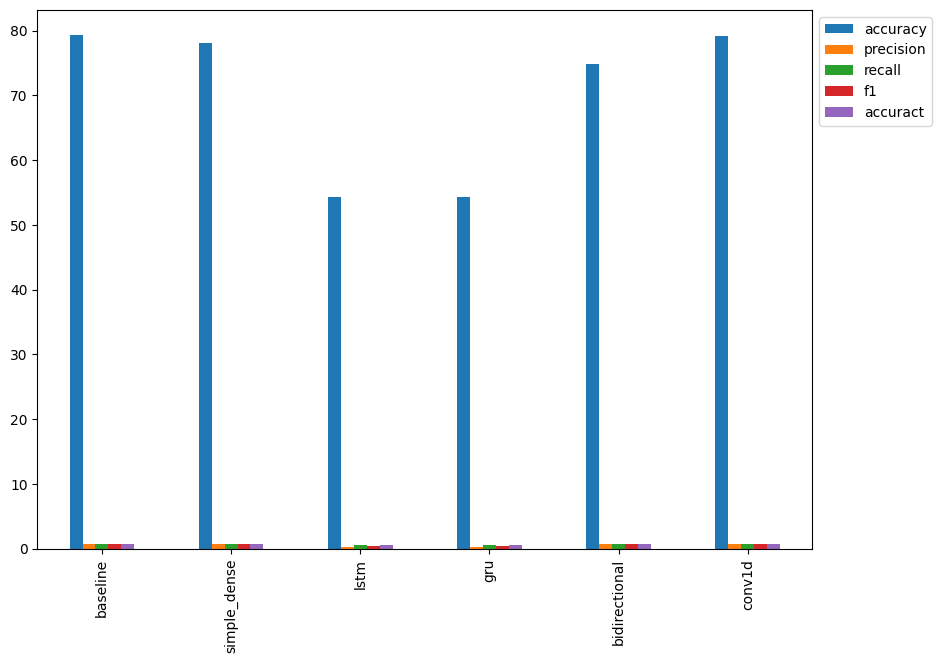

In [ ]:
import matplotlib.pyplot as plt

# Tüm model sonuçlarını çizin ve karşılaştırın
all_model_results.plot(
    kind="bar",
    figsize=(10, 7),
)

# Legend'i sağ üst köşeye yerleştir
plt.legend(bbox_to_anchor=(1.0, 1.0))  # Sağ üst köşeye legend
plt.show()  # Grafiği göster

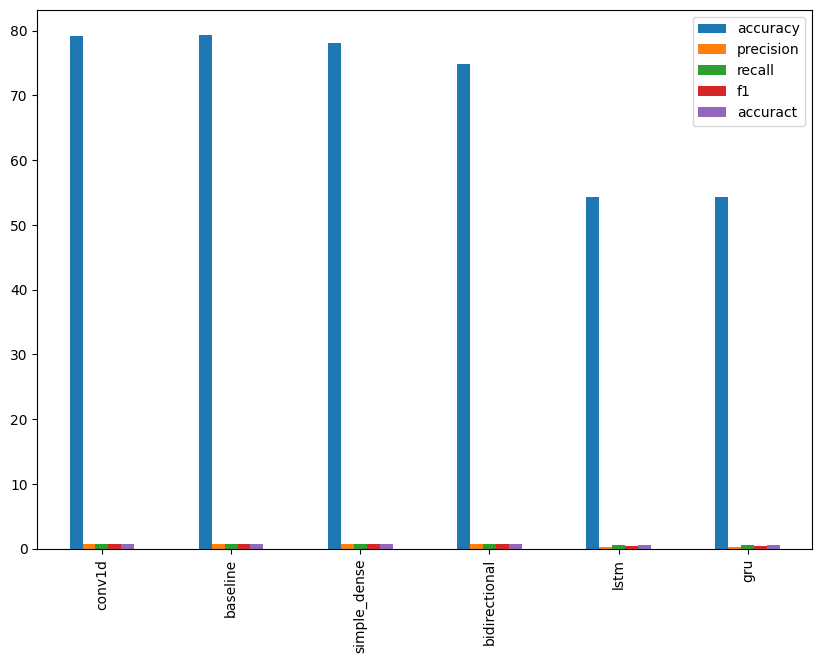

In [ ]:
# Model sonuçlarını f1 puanına göre sıralayın
all_model_results.sort_values("f1", ascending = False).plot(kind = "bar", figsize = (10, 7));

# **5. Modelleri birleştirmek**

Birçok üretim sistemi, bir tahmin yapmak için bir model topluluğu (birden fazla farklı model bir arada) kullanır.

Model istiflemenin arkasındaki fikir, eğer birkaç korelasyonsuz model bir tahminde hemfikirse, tahminin tekil bir model tarafından yapılan bir tahminden daha sağlam olması gerektiğidir.

Yukarıdaki cümledeki anahtar kelime korelasyonsuzdur, bu da farklı model türlerini söylemenin başka bir yoludur. Örneğin, bizim durumumuzda, temel çizgimizi, çift yönlü modelimizi ve TensorFlow Hub USE modelimizi birleştirebiliriz.

Bu modellerin hepsi aynı veriler üzerinde eğitilmiş olsa da, hepsinin kalıpları bulmanın farklı bir yolu vardır.

Üç LSTM modeli gibi benzer şekilde eğitilmiş üç model kullanacak olsaydık, çıktıkları tahminler muhtemelen çok benzer olacaktır.

Bunu arkadaşlarınızla nerede yemek yiyeceğinize karar vermeye çalışmak olarak düşünün. Hepiniz benzer zevklere sahipseniz, muhtemelen hepiniz aynı restoranı seçeceksiniz. Ama hepinizin farklı zevkleri varsa ve yine de aynı restoranı seçiyorsanız, restoran iyi olmalı.

Bir sınıflandırma sorunuyla çalıştığımız için, modellerimizi birleştirmenin birkaç yolu vardır:

1. Ortalama - Her örnek için her modelin çıktı tahmin olasılıklarını alın, birleştirin ve ardından ortalamasını alın.

2. Çoğunluk oyu (mod) - Tüm örneklerde modellerinizin her biriyle sınıf tahminleri yapın, tahmin edilen sınıf çoğunlukta olandır. Örneğin, üç farklı model sırasıyla [1, 0, 1] tahmin ederse, çoğunluk sınıfı 1'dir, bu nedenle bu tahmin edilen etiket olacaktır.

3. Model istifleme - Seçtiğiniz modellerin her birinin çıktılarını alın ve bunları başka bir modele girdi olarak kullanın.

📖 Kaynak: Model istifleme/birleştirme için yukarıdaki yöntemler Andriy Burkov tarafından Makine Öğrenimi Mühendisliği Kitabı'nın 6. Bölümünden uyarlanmıştır. Sadece bina modelleri değil, üretim ölçeğinde makine öğrenimi sistemleri için de makine öğrenimi mühendisliği alanına girmek istiyorsanız, bütünüyle okumanızı şiddetle tavsiye ederim. http://www.mlebook.com/wiki/doku.php

Yine, model istifleme kavramı en iyi eylemde görülür.

Temel modelimizi (model_0), LSTM modelimizi (model_2) ve her birinin birleşik tahmin olasılıklarının ortalamasını alarak tüm eğitim verileri (model_6) üzerinde eğitilmiş USE modelimizi birleştireceğiz.

In [ ]:
# 3 model için ortalama tercih olasıklarını alın

# temel modelden tahmin olasılıklarını alın
baseline_pred_probs = np.max(model_0.predict_proba(val_sentences), axis = 1)

combined_pred_probs = baseline_pred_probs + tf.squeeze(model_2_pred_probs, axis = 1) + tf.squeeze(model_5_pred_probs)

# tahmin sınıfları almak için tahmin olasılıklarının ortalamasını alın ve yuvarlayın
combined_preds = tf.round(combined_pred_probs / 3)

combined_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0.], dtype=float32)>

In [ ]:
# Tahmin olasılıklarının ortalamasını alarak sonuçları hesaplayın
ensemble_results = calculate_results(val_labels, combined_preds)

In [ ]:
# Birleştirilmiş modelimizin sonuçlarını DataFrame sonuçlarına ekleyin
all_model_results.loc["ensemble_results"] = ensemble_results

In [ ]:
# Ensemble modelinin doğruluğunu geri kalan sonuçlarla aynı ölçeğe dönüştürün
all_model_results.loc["ensemble_results", "accuracy"] = all_model_results.loc["ensemble_results"]["accuracy"] / 100

In [ ]:
all_model_results

,accuracy,precision,recall,f1,accuract
baseline,79.265092,0.811139,0.792651,0.786219,0.792651
simple_dense,78.083990,0.783784,0.780840,0.778400,0.780840
lstm,54.330709,0.295183,0.543307,0.382533,0.543307
gru,54.330709,0.295183,0.543307,0.382533,0.543307
bidirectional,74.803150,0.747624,0.748031,0.747698,0.748031
conv1d,79.133858,0.799746,0.791339,0.787404,0.791339
ensemble_results,0.765092,0.766007,0.765092,0.763281,NaN


# **6. Eğitimli bir modeli kaydetme ve yükleme**

TensorFlow'da bir modeli kaydetmenin iki ana yolu vardır: https://www.tensorflow.org/tutorials/keras/save_and_load?hl=tr#save_the_entire_model

1. HDF5 formatı.

2. SavedModel formatı (varsayılan).

In [ ]:
# TF Hub Cümle Kodlayıcı modelini HDF5 formatına kaydedin
model_6.save("model_5.h5")

Bir modeli HDF5 olarak kaydederseniz, tekrar yüklerken, TensorFlow'a kullandığınız tüm özel nesneler hakkında bilgi vermeniz gerekir (örneğin, TensorFlow Hub bileşenleri gibi saf TensorFlow'dan oluşturulmayan bileşenler).

https://www.tensorflow.org/tutorials/keras/save_and_load#saving_custom_objects

In [ ]:
# Modeli özel Hub Katmanıyla yükleyin (HDF5 formatı için gereklidir)
loaded_model_5 = tf.keras.models.load_model("model_5.h5",
                                            custom_objects={"KerasLayer": hub.KerasLayer})

In [ ]:
# Yüklenen modelimizin performansı nasıl?
loaded_model_5.evaluate(val_sentences, val_labels)

NameError: Exception encountered when calling Lambda.call().

[1mname 'sentence_encoder_layer' is not defined[0m

Arguments received by Lambda.call():
  • inputs=tf.Tensor(shape=(None,), dtype=string)
  • mask=None
  • training=False

In [ ]:
# TF Hub Cümle Kodlayıcı modelini SavedModel formatına kaydedin (varsayılan)
model_5.save("model_5_SavedModel_format")

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=model_5_SavedModel_format.

SavedModel biçimi (varsayılan) kullanıyorsanız, tensorflow.keras.models.load_model() işlevini kullanarak özel nesneler belirtmeden modelinizi yeniden yükleyebilirsiniz. https://www.tensorflow.org/tutorials/keras/save_and_load?hl=tr

In [ ]:
# TF Hub Cümle Kodlayıcıyı Yükle SavedModel
loaded_model_5_SavedModel = tf.keras.models.load_model("model_5_SavedModel_format")

ValueError: File format not supported: filepath=model_5_SavedModel_format. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(model_5_SavedModel_format, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).

In [ ]:
# Yüklenen SavedModel formatını değerlendirin
loaded_model_5_SavedModel.evaluate(val_sentences, val_labels)

NameError: name 'loaded_model_5_SavedModel' is not defined

🤔 Soru: SavedModel formatını mı yoksa HDF5 formatını mı kullanmalısınız?

Çoğu kullanım durumu için, SavedModel formatı yeterli olacaktır. Ancak, bu TensorFlow'a özgü bir standarttır. Daha genel amaçlı bir veri standardına ihtiyacınız varsa, HDF5 daha iyi olabilir. Daha fazlası için, modelleri kaydetme ve yükleme ile ilgili TensorFlow belgelerine göz atın. https://www.tensorflow.org/tutorials/keras/save_and_load?hl=tr

**Colab'tan dosya indirmek için:**

from google.colab import files

files.download('example.txt')


*******************************

!wget (model uzantısını yaz, kurs materyallerinde var, USE feature extractor model)

!unzip (bu modelin adı: 08_model_6_USE_feature_extractor.zip)

yüklenen bu model ile aşağıdaki işlemleri yap.

**Önceden eğitilmiş modeli google deposundan indirme**

model_6_pretrained = tf.keras.models.load_model("model ismi")

model_6_pretrained.evaluate(val_sentences, val_labels)

**Bu model ile tahminler yapma**

model_6_pretrained_pred_probs = model_6_pretrained.predict (val_sentences)

model_6_pretrained_preds = tf.squeeze(tf.round(model_6_pretrained_pred_probs))

model_6_pretrained [:10]

# **7. En yanlış örnekleri bulmak**

Daha önce, modelleme deneylerimizin çoğu, farklı türde modeller kullanmasına rağmen benzer sonuçlar veriyorsa, verilere geri dönmenin ve bunun neden olabileceğini incelemenin iyi bir fikir olduğundan bahsetmiştik.

Verilerinizi incelemenin en iyi yollarından biri, modelinizin tahminlerini sıralamak ve en çok yanlış aldığı örnekleri bulmaktır, yani hangi tahminlerin yüksek bir tahmin olasılığı vardı, ancak yanlış olduğu ortaya çıktı.

Bir kez daha, görselleştirme sizin arkadaşınızdır. Görselleştirin, görselleştirin, görselleştirin.

İşleri görsel hale getirmek için, en iyi performans gösteren modelimizin tahmin olasılıklarını ve sınıflarını doğrulama örnekleri (metin ve temel doğruluk etiketleri) ile birlikte alalım ve bunları bir panda DataFrame'de birleştirelim.

* En iyi modelimiz hala mükemmel değilse, hangi örnekler yanlış gidiyor?

* Hangileri en yanlış?

* Yanlış olan bazı etiketler var mı? Örn. model doğru anlıyor ama temel doğruluk etiketi bunu yansıtmıyor

In [ ]:
# Doğrulama cümleleri ve en iyi performans gösteren model tahminleriyle veri çerçevesi oluşturun
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_5_preds,
                       "pred_prob": tf.squeeze(model_5_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.340074
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.655321
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.999571
3,@camilacabello97 Internally and externally scr...,1,0.0,0.180198
4,Radiation emergency #preparedness starts with ...,1,0.0,0.027801


In [ ]:
# Yanlış tahminleri bulun ve tahmin olasılıklarına göre sıralayın
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong[:10]

,text,target,pred,pred_prob
303,Trafford Centre film fans angry after Odeon ci...,0,1.0,0.998052
698,åÈMGN-AFRICAå¨ pin:263789F4 åÈ Correction: Ten...,0,1.0,0.994602
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.982095
606,Maid charged with stealing Dh30000 from police...,0,1.0,0.976503
643,another day another excellent @_dangerousbeans...,0,1.0,0.971721
206,Head on head collision Ima problem and nobody ...,0,1.0,0.967165
377,We're #hiring! Read about our latest #job open...,0,1.0,0.961218
181,Article by Michael Jackman at Metro Times Detr...,0,1.0,0.956201
284,Truth...\nhttps://t.co/h6amECX5K7\n#News\n#BBC...,0,1.0,0.950727
474,My phone looks like it was in a car ship airpl...,0,1.0,0.940115


Son olarak, örnek metni, doğruluk etiketini, tahmin sınıfını ve tahmin olasılığını görselleştirmek için biraz kod yazabiliriz. Örneklerimizi tahmin olasılığına göre sıraladığımız için, örnekleri most_wrong DataFrame'imizin kafasından görüntülemek bize yanlış pozitifler gösterecektir.

Bir hatırlatma:

0 = Gerçek bir felaket Tweeti değil

1 = Gerçek felaket Tweeti

In [ ]:
# Yanlış pozitifleri kontrol edin (0 olması gerekirken model 1'i öngördü)
for row in most_wrong[:10].itertuples(): # ilk 10 satırda döngü yapın (farklı satırları görüntülemek için dizini değiştirin)
  _, text, target, pred, prob = row
  print(f"Hedef: {target}, Tahmin: {int(pred)}, Olasılık: {prob}")
  print(f"Cümle:\n{text}\n")
  print("----\n")

Hedef: 0, Tahmin: 1, Olasılık: 0.9980522394180298
Cümle:
Trafford Centre film fans angry after Odeon cinema evacuated following false fire alarm   http://t.co/6GLDwx71DA

----

Hedef: 0, Tahmin: 1, Olasılık: 0.994601845741272
Cümle:
åÈMGN-AFRICAå¨ pin:263789F4 åÈ Correction: Tent Collapse Story: Correction: Tent Collapse story åÈ http://t.co/fDJUYvZMrv @wizkidayo

----

Hedef: 0, Tahmin: 1, Olasılık: 0.9820945858955383
Cümle:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

----

Hedef: 0, Tahmin: 1, Olasılık: 0.9765028953552246
Cümle:
Maid charged with stealing Dh30000 from police officer sponsor http://t.co/y35qtVDSOH | https://t.co/qhUJAjCTR5

----

Hedef: 0, Tahmin: 1, Olasılık: 0.9717206954956055
Cümle:
another day another excellent @_dangerousbeans porridge. seriously people. blood orange in porridge is phenomenal.

----

Hedef: 0, Tahmin: 1, Olasılık: 0.9671646952629089
Cümle:
Head on head

Yanlış negatifleri incelemek için most_wrong DataFrame'imizin alt ucunu görüntüleyebiliriz (model, 1, gerçek felaket Tweeti tahmin etmesi gerektiğinde gerçek bir diaster Tweeti değil, 0'ı tahmin eder).

In [ ]:
# En yanlış yanlış negatifleri kontrol edin (1'i tahmin etmesi gerekirken model 0'ı tahmin etti)
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, prob = row
  print(f"Hedef: {target}, Tahmin: {int(pred)}, Olasılık: {prob}")
  print(f"Cümle:\n{text}\n")
  print("----\n")

Hedef: 1, Tahmin: 0, Olasılık: 0.0021491548977792263
Cümle:
@Dirk_NoMissSki yea but if someone faints why are they panicking?.. thats basic stuff ??

----

Hedef: 1, Tahmin: 0, Olasılık: 0.0014799280324950814
Cümle:
Finnish ministers: Fennovoima nuclear reactor will go ahead http://t.co/vB3VFm76ke #worldnews #news #breakingnews

----

Hedef: 1, Tahmin: 0, Olasılık: 0.001385074807330966
Cümle:
Crazy Mom Threw Teen Daughter a NUDE Twister Sex Party According To Her Friend50 =&gt;http://t.co/Hy5Pbe12TM http://t.co/c1nJpLi5oR

----

Hedef: 1, Tahmin: 0, Olasılık: 0.001010413863696158
Cümle:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----

Hedef: 1, Tahmin: 0, Olasılık: 0.0008541018469259143
Cümle:
#ClimateChange Eyewitness to Extreme Weather: 11 Social Media Posts that Show Just How Crazy Things A... http://t.co/czpDn9oBiT #Anarchy

----

Hedef: 1, Tahmin: 0, Olasılık: 0.0006994528230

# **8. Test etmek**

### **8.1. Test veri kümelerinde tahminlerde bulunmak**

In [ ]:
# Test veri seti üzerinde tahminler yapmak
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_5.predict([test_sample])) # liste olmalı
  pred = tf.round(pred_prob)
  print(f"Tahmin: {int(pred)}, Olasılık: {pred_prob}")
  print(f"Cümle:\n{test_sample}\n")
  print("----\n")

ValueError: Unrecognized data type: x=["Tonight It's Going To Be Mayhem @ #4PlayThursdays. Everybody Free w/ Text. 1716 I ST NW (18+) http://t.co/N8w252JoVT"] (of type <class 'list'>)

### **8.2. Yeni (dışarıdan) örnekler ile modeli test etmek**

In [ ]:
# Tweet'i dizeye dönüştürün
daniels_tweet = "Life like an ensemble: take the best choices from others and make your own"

In [ ]:
# Bir model ve örnek bir cümle almak ve bir tahmin döndürmek için fonksiyon yaz

def predict_on_sentence(model, sentence):
  """
  Cümle hakkında tahminde bulunmak için modeli kullanır.
  Cümleyi, tahmin edilen etiketi ve tahmin olasılığını döndürür.
  """
  pred_probs = model.predict([sentence])
  pred_label = tf.squeeze(tf.round(pred_probs)).numpy()
  print(f"Tahmin: {pred_label}", "(gerçek felaket)" if pred_label > 0 else "(gerçek felaket değil)", f"OLasılık: {pred_prob[0][0]}")
  print(f"Cümle:\n{sentence}")

In [ ]:
# Vahşi doğadan Tweetle ilgili bir tahmin yapın
predict_on_sentence(model = model_5,      # USE modeli kullan
                    sentence = daniels_tweet)

ValueError: Unrecognized data type: x=['Life like an ensemble: take the best choices from others and make your own'] (of type <class 'list'>)

In [ ]:
beirut_tweet_1 = "Reports that the smoke in Beirut sky contains nitric acid, which is toxic. Please share and refrain from stepping outside unless urgent. #Lebanon"

beirut_tweet_2 = "#Beirut declared a “devastated city”, two-week state of emergency officially declared. #Lebanon"

In [ ]:
# İlk tweetin tahmini
predict_on_sentence(model=model_6,
                    sentence=beirut_tweet_1)

ValueError: Unrecognized data type: x=['Reports that the smoke in Beirut sky contains nitric acid, which is toxic. Please share and refrain from stepping outside unless urgent. #Lebanon'] (of type <class 'list'>)

In [ ]:
# İkinci tweetin tahmini
predict_on_sentence(model=model_6,
                    sentence=beirut_tweet_2)

### **8.3. Kişisel denemelerim**

In [ ]:
# İstanbul Havalima'nında meydana gelen patlamada kimse yaralanmadı.
tweet_1 = "No one was injured in the explosion at Istanbul Airport."

# Tahmin
predict_on_sentence(model=model_6,
                    sentence=tweet_1) # doğru

In [ ]:
# Beni öyle kızdırıyor ki kafasını kırmak istiyorum!
tweet_2 = "She makes me so angry I want to break her head!"

# Tahmin
predict_on_sentence(model=model_6,
                    sentence=tweet_2) #yanlış

In [ ]:
# Seni öyle ölesiye seviyorum ki içimde bombalar patlıyor.
tweet_3 = "I love you so much that bombs are exploding inside me."

# Tahmin
predict_on_sentence(model=model_6,
                    sentence=tweet_3) # tartışılır :)

In [ ]:
# Metrobüslerde çıkan kavgada iki kişi yaralandı, şaka şaka :)
tweet_4 = "Two people were injured in the fight on the metrobuses, just kidding :)"

# Tahmin
predict_on_sentence(model=model_6,
                    sentence=tweet_4) # yapay zeka şakadan anlar mı daha çok denemek lazım :)

In [ ]:
# Türkçe deneme, acaba işe yarar mı?
tweet_5 = "Almanyada polis, masum Filistin göstericilerine ağır şiddet uyguladı"

# Tahmin
predict_on_sentence(model=model_6,
                    sentence=tweet_5)
# model ingilizce cümleler ile eğitildiği için bilmemesi normal.

# **9. Hız - Puan kıyası**

Deneme yoluyla bulduğunuz en iyi performans modelini seçmek cazip gelse de, bu model aslında bir üretim ortamında çalışmayabilir.

Şöyle düşünün, Twitter olduğunuzu ve saatte 1 milyon Tweet aldığınızı hayal edin (bu uydurma bir sayıdır, gerçek sayı çok daha yüksektir). Ve Tweetleri okumak ve yetkilileri gerçek zamanlıya yakın bir felaketle ilgili ayrıntılarla uyarmak için bir diaster algılama sistemi kurmaya çalışıyorsunuz.

Hesaplama gücü ücretsiz değildir, bu nedenle proje için tek bir bilgi işlem makinesiyle sınırlıdır. Bu makinede, modellerinizden biri %80 doğrulukla saniyede 10.000 tahmin yaparken, modellerinizden bir diğeri (daha büyük bir model) %85 doğrulukla saniyede 100 tahmin yapar.

Hangi modeli seçiyorsunuz?

İkinci modelin performans artışı ekstra kapasiteyi kaçırmaya değer mi?

Tabii ki, burada deneyebileceğiniz birçok seçenek var, örneğin ilk modele mümkün olduğunca çok Tweet göndermek ve ardından modelin en az emin olduğu modelleri ikinci modele göndermek gibi.

Buradaki nokta, deney yoluyla bulduğunuz en iyi modeli göstermektir, üretimde kullandığınız model olmayabilir.

Bunu daha somut hale getirmek için, bir model almak için bir işlev ve verilen modelin bu örnekler üzerinde tahminlerde bulunmanın ne kadar sürdüğünü bir dizi örnek ve süre yazalım.

In [ ]:
# Tahminlerin zamanını hesaplayın

import time
def pred_timer(model, samples):
  """
  Bir modelin örnekler üzerinde tahmin yapmasının ne kadar zaman aldığını gösterir.

  Argümanlar:
  ----
  model = eğitilmiş bir model
  örnek = örneklerin listesi

  İşlem:
  ----
  total_time = modelin örnekler üzerinde tahmin yapması için geçen toplam süre
  time_per_pred = tek örnek başına saniye cinsinden süre
  """
  start_time = time.perf_counter()
  model.predict(samples)
  end_time = time.perf_counter()
  total_time = end_time - start_time
  time_per_pred = total_time / len(val_sentences)
  return total_time, time_per_pred

In [ ]:
# TF Hub Cümle Kodlayıcı tahmin sürelerini hesaplayın
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model_6, val_sentences)
model_6_total_pred_time, model_6_time_per_pred

In [ ]:
# Naive Bayes tahmin sürelerini hesaplayın
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentences)
baseline_total_pred_time, baseline_time_per_pred

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label="temel")
plt.scatter(model_6_time_per_pred, model_6_results["f1"], label="tf_hub_sentence_encoder")
plt.legend()
plt.title("Tahmin başına zamana karşı F1 puanı")
plt.xlabel("Tahmin başına süre")
plt.ylabel("F1-Skoru");

In [ ]:
from IPython.display import display, Image

# Resmin URL'si
image_url = "https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/08-ideal-performance-speed-of-pred-tradeoff-highlighted.png"

# Resmi göster
display(Image(image_url))

Hız ve performans dengesi modeli için ideal konum (mükemmel sonuçlarla hızlı tahminler).

Tabii ki, bu noktaların her biri için ideal konum, arsanın sol üst köşesinde olmaktır (tahmin başına düşük zaman, yüksek F1 puanı).

Bizim durumumuzda, tahmin ve performans başına zaman için net bir denge var. En iyi performans gösteren modelimiz tahmin başına büyüklük sırası daha uzun sürer, ancak yalnızca birkaç F1 puan puanı artışıyla sonuçlanır.

Bu tür bir değiş tokuş, makine öğrenimi modellerini kendi uygulamalarınıza dahil ederken aklınızda bulundurmanız gereken bir şeydir.

# **10. Kaynakça**

Öğrendiklerinizi uygulamak için, aşağıdakilerden 3'üne bir saat harcamak (toplam 3 saat, isterseniz hepsini gözden geçirebilirsiniz) ve ardından öğrendikleriniz hakkında bir blog yazısı yazmak iyi bir fikir olacaktır.

* NLP içindeki farklı sorunlara ve bunların nasıl çözüleceğine genel bir bakış için şunu okuyun:

* Doğal Dil İşlemeye Basit Bir Giriş https://becominghuman.ai/a-simple-introduction-to-natural-language-processing-ea66a1747b32

* NLP problemlerinin %90'ı nasıl çözülür: adım adım kılavuz https://blog.insightdatascience.com/how-to-solve-90-of-nlp-problems-a-step-by-step-guide-fda605278e4e

* MIT'nin Tekrarlayan Sinir Ağları dersini gözden geçirin. Bu, inşa etmekte olduğunuz RNN modelinin arkasında olup bitenlere yapılan en büyük eklemelerden biri olacak. https://www.youtube.com/watch?v=SEnXr6v2ifU

* TensorFlow web sitesindeki kelime gömme sayfasını okuyun. Gömmeler NLP'nin çok büyük bir parçasıdır. Onları bu defter boyunca ele aldık ama ekstra alıştırma buna değer. Kılavuzdaki tüm kodu yeni bir not defterine yazmak iyi bir alıştırma olacaktır. https://www.tensorflow.org/text/guide/word_embeddings?hl=tr

* TensorFlow'daki RNN'ler hakkında daha fazla bilgi için TensorFlow RNN kılavuzunu okuyun ve çoğaltın. Bu kılavuzdaki birçok kavramı ele aldık, ancak kodu kendiniz için tekrar yazmaya değer. https://www.tensorflow.org/guide/keras/working_with_rnns

* Metin verileri her zaman indirdiğimiz veriler gibi güzel bir pakette gelmez. Bu nedenle, TensorFlow derin öğrenme modellerinizle birlikte olmak için farklı metin kaynakları hazırlama konusunda daha fazla şey peşindeyseniz, aşağıdakileri kontrol etmeye değer:

* TensorFlow metin yükleme öğreticisi. https://www.tensorflow.org/tutorials/load_data/text?hl=tr

* Real Python tarafından Python ile metin dosyalarını okumak. https://realpython.com/read-write-files-python/

* Bu not defteri NLP kodu yazmaya odaklandı. Derin Öğrenme ile NLP'nin nasıl gerçekleştiğine dair matematiksel olarak zengin bir genel bakış için, Standford'un Derin Öğrenme ile Doğal Dil İşleme ders notları Bölüm 1'i okuyun. https://web.stanford.edu/class/cs224n/readings/cs224n-2019-notes01-wordvecs1.pdf

  * Daha da derin bir dalış için, tüm CS224n (Derin Öğrenme ile Doğal Dil İşleme) kursunu bile yapabilirsiniz.

* Okumak için harika blog gönderileri:

  * Andrei Karpathy'nin RNN'lerin Mantıksız Etkinliği, RNN'lerle Shakespeare metni oluşturmaya dalıyor. https://karpathy.github.io/2015/05/21/rnn-effectiveness/

  * NLP ile Metin Sınıflandırması: Mauro Di Pietro tarafından Tf-Idf vs Word2Vec vs BERT. Metni sayılara dönüştürmek ve ardından sınıflandırmak için farklı tekniklere genel bir bakış. https://towardsdatascience.com/text-classification-with-nlp-tf-idf-vs-word2vec-vs-bert-41ff868d1794

  * Kelime gömme nedir? Makine Öğrenimi Ustalığı tarafından. https://machinelearningmastery.com/what-are-word-embeddings/

* İnlemeye değer diğer konular:

  * Dikkat mekanizmaları. Bunlar, transformatör mimarisinin temel bir bileşenidir ve ayrıca genellikle derin NLP modellerine iyileştirmeler ekler. https://jalammar.github.io/visualizing-neural-machine-translation-mechanics-of-seq2seq-models-with-attention/

  * Transformatör mimarileri. Bu model mimarisi son zamanlarda NLP dünyasını kasıp kavurdu ve birçok ölçütte en son teknolojiye ulaştı. Bununla birlikte, yerden kalkmak için biraz daha fazla işlem gerekiyor, HuggingFace Modelleri (eski adıyla HuggingFace Transformers) kitaplığı muhtemelen en iyi hızlı başlangıcınızdır.

    * Ve şimdi HuggingFace'in kütüphanelerinin nasıl çalıştığına dair kendi kursu bile var! Ben yapmadım ama HuggingFace'in yaptığı her şey birinci sınıf.

    * http://jalammar.github.io/illustrated-transformer/
    * https://huggingface.co/models
    * https://huggingface.co/learn/nlp-course/chapter1/1

📖 Kaynak: GitHub'daki tüm kurs materyallerine bakın: https://github.com/mrdbourke/tensorflow-deep-learning